# Sentiment Analysis of USA Presidential Election 2020

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import html

try:
    import nltk
except:
    !pip install nltk
    import nltk
try:
    import re
except:
    !pip install re
    import re

import itertools

try:
    from wordcloud import WordCloud
except:
    !pip install wordcloud
    from wordcloud import WordCloud 
    
    
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import shuffle

from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn import grid_search
#from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import preprocessing

try:
    import graphviz 
except:
    !pip install graphviz

In [2]:
# Setting max display length in our IPython Notebook
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

<ipython-input-2-fdbf53638479>:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [3]:
# Loading Data Files

df_sentiment = pd.read_csv('sentiment_analysis.csv')
df_election = pd.read_csv('US_Elections_2020.csv')

df_stopwords = pd.read_table("stop_words.txt", names = ['stopwords'])
df_corpus = pd.read_table("corpus.txt", names = ['corpus'])

In [4]:
# Looking at the sentiment_analysis data
print(df_sentiment.shape)
df_sentiment.head()

(550391, 3)


,ID,text,label
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeders Crown Super Sunday https://t.co/antImqAo4Y https://t.co/ejnA78Sks0,1
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan on becoming #No1TestTeam in the world against all odds! #JI_PakZindabadRallies https://t.co/1o…,1
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taking you to Maine Mendoza’s surprise thanksgiving party she threw for her fans! https://t.co/oX…",1
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks a million to our custodial painters this summer. Great job ladies!!!#EC_proud https://t.co/…",1
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as of July 2017 Feschotte lab will be relocating to @Cornell MBG https://t.co/dd0FG7BRx3,1


In [5]:
df_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550391 entries, 0 to 550390
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      550391 non-null  float64
 1   text    550391 non-null  object 
 2   label   550391 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 12.6+ MB


In [6]:
# Looking at US_Election_2020 data files
print(df_election.shape)
df_election.head()

(2552, 3)


,text,sentiment,negative_reason
0,"b'@robreiner so afraid of Nov, Dec, and Jan! Even if #BidenHarris2020 win...frump has 3 months to do even more damage than he has.'",0,covid19
1,"b""RT @SueC00K: Lord Sumption launches Recovery - a new initiative to promote #AnotherWay to deal with #Covid. Hysteria and rushed laws",0,others
2,"b'RT @WalidPhares: Uber Timing: after #Biden advisors said they would put pressure on #Brazil &amp; sanction @jairbolsonaro Gov ""when"" elected,",0,covid19
3,b'Every 107 seconds an American is dying from the #TrumpVirus \n\n#DonaldTrump thinks that is a success.\n\n#JoeBiden https://t.co/BlJRIl6VpN',1,NaN
4,b'RT @thewebbix: The #Democrats embrace #DiversityandInclusion for all citizens that make our nation what it is. Each of us must #Vote to,1,NaN


In [7]:
df_election['sentiment'].unique

<bound method Series.unique of 0       0
1       0
2       0
3       1
4       1
5       0
6       0
7       1
8       0
9       0
10      0
11      0
12      0
13      0
14      1
15      1
16      0
17      0
18      0
19      1
20      0
21      1
22      0
23      1
24      1
25      1
26      0
27      0
28      1
29      1
30      1
31      1
32      0
33      1
34      1
35      1
36      1
37      1
38      1
39      0
40      0
41      1
42      0
43      0
44      0
45      1
46      0
47      1
48      1
49      0
50      0
51      1
52      0
53      0
54      1
55      0
56      0
57      0
58      1
59      1
60      0
61      0
62      1
63      1
64      0
65      0
66      0
67      0
68      0
69      0
70      1
71      1
72      1
73      1
74      0
75      1
76      1
77      1
78      0
79      0
80      0
81      0
82      1
83      1
84      1
85      0
86      1
87      1
88      1
89      0
90      1
91      0
92      1
93      1
94      0
95      0
96      0

In [8]:
df_election['negative_reason'].unique

<bound method Series.unique of 0       covid19       
1       others        
2       covid19       
3       NaN           
4       NaN           
5       discrimination
6       discrimination
7       NaN           
8       corruption    
9       covid19       
10      corruption    
11      crime         
12      crime         
13      discrimination
14      NaN           
15      NaN           
16      corruption    
17      corruption    
18      covid19       
19      NaN           
20      covid19       
21      NaN           
22      covid19       
23      NaN           
24      NaN           
25      NaN           
26      discrimination
27      corruption    
28      NaN           
29      NaN           
30      NaN           
31      NaN           
32      covid19       
33      NaN           
34      NaN           
35      NaN           
36      NaN           
37      NaN           
38      NaN           
39      covid19       
40      covid19       
41      NaN           
42 

In [9]:
# Looking at stop_words.txt file
print(df_stopwords.shape)
df_stopwords.head()

(665, 1)


,stopwords
0,a
1,able
2,about
3,above
4,abst


In [10]:
# Looking at corpus.txt file
print(df_corpus.shape)
df_corpus.head()

(2477, 1)


,corpus
abandon,-2
abandoned,-2
abandons,-2
abducted,-2
abduction,-2


In [11]:
# getting the list of stop words
stop_words = df_stopwords['stopwords'].tolist()
#print(stop_words)

# 1.Data Cleaning
The tweets, as given, are not in a form amenable to analysis – there is too much ‘noise’. Therefore, the first step is to “clean” the data. Design a procedure that prepares the Twitter data for analysis by satisfying the requirements below.
<li> All html tags and attributes (i.e., /<[^>]+>/) are removed.
<li> Html character codes (i.e., &...;) are replaced with an ASCII equivalent.
<li> All URLs are removed.
<li> All characters in the text are in lowercase.
<li> All stop words are removed. Be clear in what you consider as a stop word.
<li> If a tweet is empty after pre-processing, it should be preserved as such.

## First we will define some data cleaning functions so we dont have to define them twice for the two file

# A fucntion to replcae all the html tags and special characters with ''


# Remove HTML ASCII
def clean_ascii(text):
    text = html.unescape(text)
    return text

# Function to clean dataframes of HTML Tags
def clean_dataframe(df,col):
    # Extracting the twitter handle
    df['twitter'] = df[col].map(lambda x: re.findall('@(?=\w+)\w+',x))
    
    # Extracting Hastags
    df['hashtags'] = df[col].map(lambda x: re.findall('#(?=\w+)\w+',x))
    
    #cleaning tags
    df[col] = df[col].map(lambda x: re.sub(r'<[^>]+>', '', x))
    
    #cleaning all urls
    df[col] = df[col].map(lambda x: re.sub(r'http\S+', '', x))
    df[col] = df[col].map(lambda x: re.sub('https?:\/\/\w+\S+', '', x))
    df[col] = df[col].map(lambda x: re.sub('\w+\.\S+', '', x))
    df[col] = df[col].map(lambda x: re.sub('https?', '', x))
    df[col] = df[col].map(lambda x: re.sub('www\.\w+\S+', '', x))
    
    #remove ascii
    df[col] = df[col].apply(clean_ascii)
       
    # cleaning punctuations and special characters (Note we are not removning # for hashtags in the future)
    df[col] = df[col].map(lambda x: re.sub(r'[^\w\s]','',x))
    df[col] = df[col].map(lambda x: re.sub(r'[?|$|.|!|@|&]','',x))

    # cleaning leading and trailing spaces
    df[col] = df[col].map(lambda x: x.strip())

    return df #,twitter, hashtags



# Removing the stop words
def clean_stopWords(df,col):
    
    df['clean'] = df[col].apply(lambda x: " ".join([word for word in x.split() if word not in stop_words]))
    
    return df
    
    
    
# A function to change the strings to lower case
def clean_lower_text(text):
    text.lower()
    
    return text


# a text joining function for joining tokenized text
def join(text):
    text = " ".join(text)
    return text

## 1.1.File: Sentiment_Analysis

**Please Note:** The cleaning process takes time. Please let the notebook run and do not interrupt

In [14]:
# Looking at the sentiment_analysis data

# obtaining clean dataframe
col = 'text'
df_sentiment['text'] = df_sentiment['text'].apply(clean_lower_text)

#cleaning HTML TAGS
#df_sentiment_clean, twitter_1, hastags_1 = clean_dataframe(df_sentiment,col)
df_sentiment_clean = clean_dataframe(df_sentiment,col)
df_sentiment_clean.head()

,ID,text,label,twitter,hashtags
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeders Crown Super Sunday,1,[],[]
1,7.680980e+17,RT MianUsmanJaved Congratulations Pakistan on becoming No1TestTeam in the world against all odds JI_PakZindabadRallies,1,[@MianUsmanJaved],"[#No1TestTeam, #JI_PakZindabadRallies]"
2,7.680980e+17,RT PEPalerts This September YESmag is taking you to Maine Mendozas surprise thanksgiving party she threw for her fans,1,"[@PEPalerts, @YESmag]",[]
3,7.680980e+17,RT david_gaibis Newly painted walls thanks a million to our custodial painters this summer Great job ladiesEC_proud,1,[@david_gaibis],[#EC_proud]
4,7.680980e+17,RT CedricFeschotte Excited to announce as of July 2017 Feschotte lab will be relocating to Cornell MBG,1,"[@CedricFeschotte, @Cornell]",[]


In [15]:
# Import some additional Required Libraries:

from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize
nltk.download('punkt')
nltk.download('stopwords')
try:
    from tqdm import tqdm
except:
    !pip install tqdm
    from tqdm import tqdm

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tua_f\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tua_f\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Removing stop words from our data. We will only use the file provided with the assignment

In [16]:
tqdm.pandas(desc="Tokenizing Progress:")

df_sentiment_clean['clean'] = df_sentiment_clean['text'].progress_apply(nltk.tokenize.word_tokenize)
stop_nltk = stopwords.words('english')
print(len(stop_nltk))

# I commented out the Stopword from NLTK as mentioned during tutorial it can remove negative sentiments
#df_sentiment_clean['clean'] = df_sentiment_clean['clean'].apply(lambda x: [word for word in x if word not in stop_nltk])
df_sentiment_clean['clean'] = df_sentiment_clean['clean'].apply(lambda x: [word for word in x if word not in stop_words])

df_sentiment_clean['clean']  = df_sentiment_clean['clean'].apply(join)

C:\Users\tua_f\Anaconda3\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
Tokenizing Progress:: 100%|██████████| 550391/550391 [01:35<00:00, 5781.23it/s]


179


Add hastags and twitter information recived from the tweets. Create a new data frame and add them

In [17]:
df_sentiment_clean['twitter_handles'] = [' '.join(map(str, tw)) for tw in df_sentiment_clean['twitter']]
df_sentiment_clean['hashtags_all'] = [' '.join(map(str, tw)) for tw in df_sentiment_clean['hashtags']]

In [18]:
df_sentiment_a_clean = df_sentiment_clean[['ID','text','label','clean','twitter_handles','hashtags_all']]
df_sentiment_a_clean.head()

,ID,text,label,clean,twitter_handles,hashtags_all
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeders Crown Super Sunday,1,Josh Jenkins forward TAB Breeders Crown Super Sunday,,
1,7.680980e+17,RT MianUsmanJaved Congratulations Pakistan on becoming No1TestTeam in the world against all odds JI_PakZindabadRallies,1,RT MianUsmanJaved Congratulations Pakistan No1TestTeam odds JI_PakZindabadRallies,@MianUsmanJaved,#No1TestTeam #JI_PakZindabadRallies
2,7.680980e+17,RT PEPalerts This September YESmag is taking you to Maine Mendozas surprise thanksgiving party she threw for her fans,1,RT PEPalerts This September YESmag Maine Mendozas surprise thanksgiving party threw fans,@PEPalerts @YESmag,
3,7.680980e+17,RT david_gaibis Newly painted walls thanks a million to our custodial painters this summer Great job ladiesEC_proud,1,RT david_gaibis Newly painted walls custodial painters summer Great job ladiesEC_proud,@david_gaibis,#EC_proud
4,7.680980e+17,RT CedricFeschotte Excited to announce as of July 2017 Feschotte lab will be relocating to Cornell MBG,1,RT CedricFeschotte Excited July 2017 Feschotte lab will relocating Cornell MBG,@CedricFeschotte @Cornell,


In [19]:
df_sentiment_a_clean.to_csv('df_sentiment_clean.csv')

## 1.2.File: US_Election_2020

In [20]:
# Looking at the sentiment_analysis data

# obtaining clean dataframe
col = 'text'
df_election['text'] = df_election['text'].apply(clean_lower_text)

#cleaning HTML TAGS
#df_election_clean, twitter_2, hastags_2 = clean_dataframe(df_election,col)
df_election_clean = clean_dataframe(df_election,col)
#Clean stopwords
df_election_clean = clean_stopWords(df_election_clean,col)

df_election_clean.head()

,text,sentiment,negative_reason,twitter,hashtags,clean
0,brobreiner so afraid of Nov Dec and Jan Even if BidenHarris2020 has 3 months to do even more damage than he,0,covid19,[@robreiner],[#BidenHarris2020],brobreiner afraid Nov Dec Jan Even BidenHarris2020 3 months damage
1,bRT SueC00K Lord Sumption launches Recovery a new initiative to promote AnotherWay to deal with Covid Hysteria and rushed laws,0,others,[@SueC00K],"[#AnotherWay, #Covid]",bRT SueC00K Lord Sumption launches Recovery initiative promote AnotherWay deal Covid Hysteria rushed laws
2,bRT WalidPhares Uber Timing after Biden advisors said they would put pressure on Brazil sanction jairbolsonaro Gov when elected,0,covid19,"[@WalidPhares, @jairbolsonaro]","[#Biden, #Brazil]",bRT WalidPhares Uber Timing Biden advisors pressure Brazil sanction jairbolsonaro Gov elected
3,bEvery 107 seconds an American is dying from the TrumpVirus nnDonaldTrump thinks that is a,1,NaN,[],"[#TrumpVirus, #DonaldTrump, #JoeBiden]",bEvery 107 seconds American dying TrumpVirus nnDonaldTrump thinks
4,bRT thewebbix The Democrats embrace DiversityandInclusion for all citizens that make our nation what it is Each of us must Vote to,1,NaN,[@thewebbix],"[#Democrats, #DiversityandInclusion, #Vote]",bRT thewebbix The Democrats embrace DiversityandInclusion citizens nation Each Vote


In [21]:
tqdm.pandas(desc="Tokenizing Progress:")

df_election_clean['clean'] = df_election_clean['text'].progress_apply(nltk.tokenize.word_tokenize)

# I commented out the Stopword from NLTK as mentioned during tutorial it can remove negative sentiments
#df_election_clean['clean'] = df_election_clean['clean'].apply(lambda x: [word for word in x if word not in stop_nltk])
df_election_clean['clean'] = df_election_clean['clean'].apply(lambda x: [word for word in x if word not in stop_words])

df_election_clean['clean']  = df_election_clean['clean'].apply(join)

C:\Users\tua_f\Anaconda3\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
Tokenizing Progress:: 100%|██████████| 2552/2552 [00:00<00:00, 4678.62it/s]


In [22]:
# adding Hastags and Twitter handle to our us election dataframe
df_election_clean['twitter_handles'] = [' '.join(map(str, tw)) for tw in df_election_clean['twitter']]
df_election_clean['hashtags_all'] = [' '.join(map(str, tw)) for tw in df_election_clean['hashtags']]

In [23]:
df_election_us_clean = df_election_clean[['text','sentiment','negative_reason','clean','twitter_handles','hashtags_all']]
df_election_us_clean.head()

,text,sentiment,negative_reason,clean,twitter_handles,hashtags_all
0,brobreiner so afraid of Nov Dec and Jan Even if BidenHarris2020 has 3 months to do even more damage than he,0,covid19,brobreiner afraid Nov Dec Jan Even BidenHarris2020 3 months damage,@robreiner,#BidenHarris2020
1,bRT SueC00K Lord Sumption launches Recovery a new initiative to promote AnotherWay to deal with Covid Hysteria and rushed laws,0,others,bRT SueC00K Lord Sumption launches Recovery initiative promote AnotherWay deal Covid Hysteria rushed laws,@SueC00K,#AnotherWay #Covid
2,bRT WalidPhares Uber Timing after Biden advisors said they would put pressure on Brazil sanction jairbolsonaro Gov when elected,0,covid19,bRT WalidPhares Uber Timing Biden advisors pressure Brazil sanction jairbolsonaro Gov elected,@WalidPhares @jairbolsonaro,#Biden #Brazil
3,bEvery 107 seconds an American is dying from the TrumpVirus nnDonaldTrump thinks that is a,1,NaN,bEvery 107 seconds American dying TrumpVirus nnDonaldTrump thinks,,#TrumpVirus #DonaldTrump #JoeBiden
4,bRT thewebbix The Democrats embrace DiversityandInclusion for all citizens that make our nation what it is Each of us must Vote to,1,NaN,bRT thewebbix The Democrats embrace DiversityandInclusion citizens nation Each Vote,@thewebbix,#Democrats #DiversityandInclusion #Vote


In [24]:
print(pd.get_option("display.max_rows"))

None


In [25]:
df_election_us_clean.shape

(2552, 6)

In [26]:
df_election_us_clean.to_csv('df_election_clean.csv')

In [27]:
#print(df_election_us_clean.loc[df_election_us_clean["text"].str.contains('#')])

In [28]:
#print(df_election_us_clean.loc[df_election_us_clean["hashtags_all"].str.contains('Trump')])

# 2. Exploratory Data Analysis
<br>
<li> Design a simple procedure that determines the political party (Republican Party, Democratic Party and Others) of a given tweet and apply this procedure to all the tweets in the 2020 US elections dataset. A suggestion would be to look at relevant words and hashtags in the tweets that identify to certain political parties or candidates. What can you say about the distribution of the political affiliations of the tweets?<br>

<br>

<li> Present a graphical figure (e.g. chart, graph, histogram, boxplot, word cloud, etc) that visualizes some aspect of the generic tweets in sentiment_analysis.csv and another figure for the 2020 US election tweets. All graphs and plots should be readable and have all axes that are appropriately labelled.

## 2.1.File: Sentiment_Analysis

In [29]:
df_sentiment_a_clean.head(1)

,ID,text,label,clean,twitter_handles,hashtags_all
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeders Crown Super Sunday,1,Josh Jenkins forward TAB Breeders Crown Super Sunday,,


In [556]:
#statistical information
df_sentiment_a_clean.describe()

,ID,label
count,5.503910e+05,550391.000000
mean,7.886687e+17,0.674686
std,1.343788e+16,0.468493
min,7.680980e+17,0.000000
25%,7.695980e+17,0.000000
50%,7.962570e+17,1.000000
75%,8.004700e+17,1.000000
max,8.046190e+17,1.000000


### Visualizing using word cloud

In [30]:
# Visualizing Top 100 hashtags in Tweet
hashtag1 = df_sentiment_a_clean['hashtags_all']
str_hashtag1 = ' '.join([''.join(elems) for elems in hashtag1])

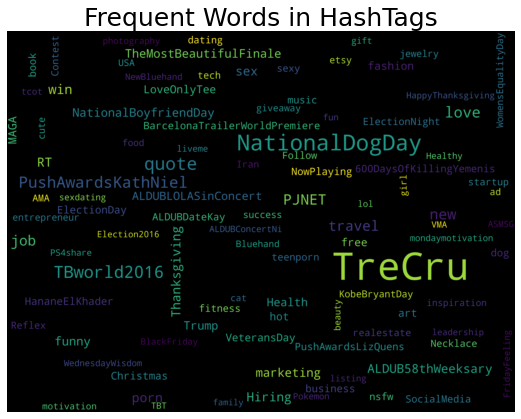

In [31]:
wordcloud = WordCloud(max_font_size=300,max_words=100,width = 4000,min_word_length=2, height = 3000,collocations=False).generate(str_hashtag1)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Frequent Words in HashTags',fontsize=25)
plt.axis("off")
plt.show()

#### Visualizing Sentiment split

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000197DDE25FD0>]],
      dtype=object)

<Figure size 864x432 with 0 Axes>

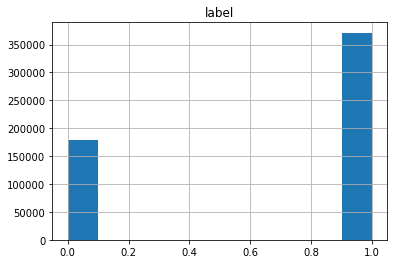

In [32]:
fig = plt.figure(figsize=(12,6))

df_sentiment_a_clean.hist('label')

We can see that we have more positive sentiments than negative in our data as per the plot above

In [33]:
# Visualizing Number of Words in Each Tweet
def count_words(text):
    return len(str(text).split())

In [34]:
df_count =  df_sentiment_a_clean[['label']]
df_count['length'] = df_sentiment_a_clean['clean'].apply(count_words)
# df_count.head()


<ipython-input-34-e45fb2fdfc05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_count['length'] = df_sentiment_a_clean['clean'].apply(count_words)


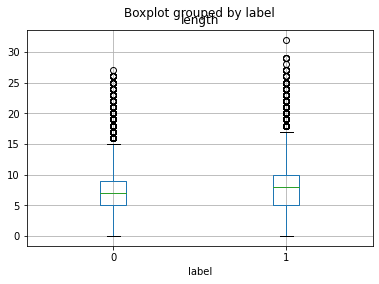

In [35]:
df_count.boxplot(by='label', column= 'length')

We can see that positive and negative tweets have similar amount of words. but positive outliers have more words in them.


## 2.2.File: US_Election_2020

For this section we are required to find the political party affiliation in the tweets. 

We will define a political party affiliation dictionary with each party name as keys and then associated keywords affiliated to that party in a list as values.

This dictionary will be used to search through the tweet to find its association with the political party.

We will use candidate name, their twitter handle, party name, party twitter handle as our keywords. 

### There are 2 Major Political Parties in USA.
**Republican Party**   (Candidate: Donald Trump)<br> 
**Democratic Party**   (Candidate: Joe Biden)<br> 
<br>
### There are 3 minor parties
**Libertarian Party**   (Candidate: Jo Jorgensen)<br>
**Green Party**   (Candidate: Howie Hawkins)<br>
**Constitution Party** (not to be considerd as they had no 2020 Candidate)<br> 

In [36]:
# Define a dictionary for the political parties and their associated keywords

parties = {
        "Republican" : ["Donald","Trump","Pence","Mike","@realDonaldTrump", "@Mike_Pence",
                     "Republican",'team red',"donaldtrump","@GOP"],
    
        "Democratic" : ["@JoeBiden","Joe","biden", "Democratic","Democrat","Kamala","Harris",
                        "@KamalaHarris",'team blue',"joebiden","@TheDemocrats","@DNC"],

        "Libertarian" : ["Libertarian"," Jo ","Jorgensen","#Libertarian","joJorgensen","@LPNational","@Jorgensen4POTUS"],

        "Green": ['Howie',"Hawkins","green party","#greenparty","howieHawkins","@GreenPartyUS","greenparty","@HowieHawkins"]
        
    }
        

Defining a function that will search through the tweets processed text, twitter handle, and hashtags used.

In [37]:
# Encoding Party affiliations for each tweet mentioning keywords
def find_affiliation(df):
    
    party_dataframe_dict = {}
    
    for index, row in df.iterrows():
        
        tweet = str(row['clean'])
        handle = str(row['twitter_handles'])
        hashtags = str(row['hashtags_all'])
        
        result = {} 
        for party, words in parties.items():
            
            affiliation_found = 0
            
            for word in words:
                word = word.lower()
                
                if word.lower() in tweet.lower():
                    affiliation_found = 1
                    
                if tweet.find(word) != -1:
                    affiliation_found = 1
                    
                if word.lower() in handle.lower():
                    affiliation_found = 1
                    
                if handle.find(word) != -1:
                    affiliation_found = 1
                    
                if word.lower() in hashtags.lower():
                    affiliation_found = 1
                    
                if hashtags.find(word) != -1:
                    affiliation_found = 1
                
                result[party] = affiliation_found 
        
        party_dataframe_dict[index] = result
    
    return party_dataframe_dict        
    


**The next step is encoding the tweets and may take some time**

In [38]:
party_dataframe_dict = find_affiliation(df_election_us_clean)

In [39]:
# Converting the party affiliatino dictionary into a DataFrame
party_encoded_df = pd.DataFrame(party_dataframe_dict).T.reset_index()
party_encoded_df.drop(columns = ['index'], axis = 1, inplace = True)

party_encoded_df.head(5)

,Republican,Democratic,Libertarian,Green
0,0,1,0,0
1,0,0,0,0
2,0,1,0,0
3,1,1,0,0
4,0,1,0,0


An uncertain column is omited as it can be understandable that if there is no party affiliation that tweet is uncertain.

In [40]:
# Combinging the Party affiliation dataframe with the tweet election data
df_election_us_clean = pd.concat([df_election_us_clean, party_encoded_df], axis=1)
print(party_encoded_df.shape)
df_election_us_clean.head(3)

(2552, 4)


,text,sentiment,negative_reason,clean,twitter_handles,hashtags_all,Republican,Democratic,Libertarian,Green
0,brobreiner so afraid of Nov Dec and Jan Even if BidenHarris2020 has 3 months to do even more damage than he,0,covid19,brobreiner afraid Nov Dec Jan Even BidenHarris2020 3 months damage,@robreiner,#BidenHarris2020,0,1,0,0
1,bRT SueC00K Lord Sumption launches Recovery a new initiative to promote AnotherWay to deal with Covid Hysteria and rushed laws,0,others,bRT SueC00K Lord Sumption launches Recovery initiative promote AnotherWay deal Covid Hysteria rushed laws,@SueC00K,#AnotherWay #Covid,0,0,0,0
2,bRT WalidPhares Uber Timing after Biden advisors said they would put pressure on Brazil sanction jairbolsonaro Gov when elected,0,covid19,bRT WalidPhares Uber Timing Biden advisors pressure Brazil sanction jairbolsonaro Gov elected,@WalidPhares @jairbolsonaro,#Biden #Brazil,0,1,0,0
3,bEvery 107 seconds an American is dying from the TrumpVirus nnDonaldTrump thinks that is a,1,NaN,bEvery 107 seconds American dying TrumpVirus nnDonaldTrump thinks,,#TrumpVirus #DonaldTrump #JoeBiden,1,1,0,0


### Visualizing Data

In [41]:
df_election_us_clean['Uncertain'] = 0
for i in range(len(df_election_us_clean['Democratic'])):
    if df_election_us_clean.iloc[i][-4:].sum() == 0:
        df_election_us_clean['Uncertain'].iloc[i] = 1

C:\Users\tua_f\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [42]:
#looking at statistical information for the data in US election
df_election_us_clean.describe()

,sentiment,Republican,Democratic,Libertarian,Green,Uncertain
count,2552.000000,2552.000000,2552.000000,2552.000000,2552.000000,2552.000000
mean,0.504702,0.359326,0.319357,0.000784,0.000784,0.679467
std,0.500076,0.479897,0.466319,0.027989,0.027989,0.466773
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


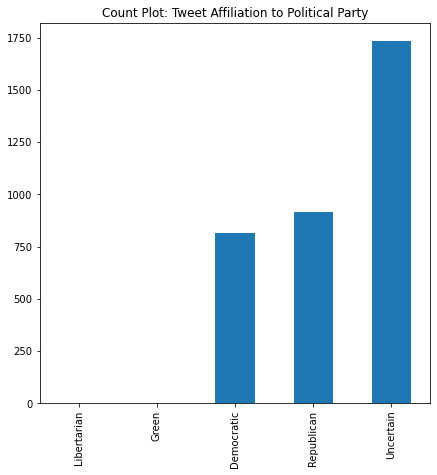

In [43]:
partyCount = df_election_us_clean.iloc[: , -5:].sum()
plot = partyCount.sort_values().plot.bar(title = 'Count Plot: Tweet Affiliation to Political Party', figsize = (7, 7))

It can be seen from the graph that maximum amount of tweets were related to the Democratic Party or the Republican Party

Additionally we can see that 1750 tweets are uncertain about their political affiliations.

In [44]:
#total sum of each party tweets
party_encoded_df.sum()

Republican     917
Democratic     815
Libertarian    2  
Green          2  
dtype: int64

Since we only have 2 Greena and Libertarian party counts compared to others. we will remove them from our data and only on focus on Democratic Party, Republican and Uncertain.

In [45]:
df_election_us_clean = df_election_us_clean[df_election_us_clean["Green"] != 1]
df_election_us_clean = df_election_us_clean[df_election_us_clean["Libertarian"] != 1]
df_election_us_clean.drop(columns = ['Green',"Libertarian"], axis = 1, inplace = True)
print(df_election_us_clean.shape)
df_election_us_clean.head(1)

(2548, 9)


,text,sentiment,negative_reason,clean,twitter_handles,hashtags_all,Republican,Democratic,Uncertain
0,brobreiner so afraid of Nov Dec and Jan Even if BidenHarris2020 has 3 months to do even more damage than he,0,covid19,brobreiner afraid Nov Dec Jan Even BidenHarris2020 3 months damage,@robreiner,#BidenHarris2020,0,1,0


Assigning Political Affiliation

In [46]:
df_election_us_clean["Party"] = "party"
for i in range(len(df_election_us_clean['Republican'])):
    
    if df_election_us_clean["Republican"].iloc[i] == 0 and df_election_us_clean["Democratic"].iloc[i] == 0:
        df_election_us_clean["Party"].iloc[i] = "Uncertain"

    elif df_election_us_clean["Republican"].iloc[i] == 1 and df_election_us_clean["Democratic"].iloc[i] == 0:
        df_election_us_clean["Party"].iloc[i] = "Republican"

    elif df_election_us_clean["Republican"].iloc[i] == 0 and df_election_us_clean["Democratic"].iloc[i] == 1:
        df_election_us_clean["Party"].iloc[i] = "Democrat"

    elif df_election_us_clean["Republican"].iloc[i] == 1 and df_election_us_clean["Democratic"].iloc[i] == 1:
        df_election_us_clean["Party"].iloc[i] = "Both"

df_election_us_clean.head(2)

C:\Users\tua_f\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,text,sentiment,negative_reason,clean,twitter_handles,hashtags_all,Republican,Democratic,Uncertain,Party
0,brobreiner so afraid of Nov Dec and Jan Even if BidenHarris2020 has 3 months to do even more damage than he,0,covid19,brobreiner afraid Nov Dec Jan Even BidenHarris2020 3 months damage,@robreiner,#BidenHarris2020,0,1,0,Democrat
1,bRT SueC00K Lord Sumption launches Recovery a new initiative to promote AnotherWay to deal with Covid Hysteria and rushed laws,0,others,bRT SueC00K Lord Sumption launches Recovery initiative promote AnotherWay deal Covid Hysteria rushed laws,@SueC00K,#AnotherWay #Covid,0,0,1,Uncertain


Text(0.5, 1.0, 'Sentiments Count Grouped by Political Party')

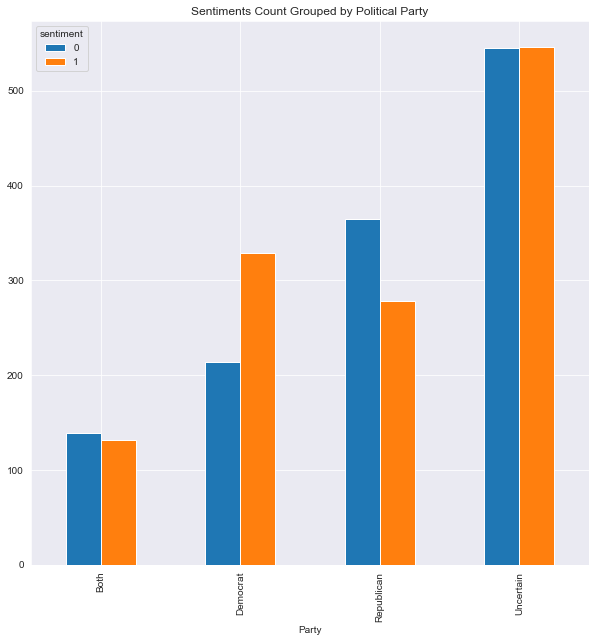

In [621]:
#Visualizing Sentiments by Political Party
number = df_election_us_clean.groupby(['Party','sentiment'])
size = number.size()
size.unstack(level=-1).plot(kind='bar', figsize = (10,10))  
plt.title("Sentiments Count Grouped by Political Party")

We can see for the graph above that maximum amount of people are uncertain about their political party affiliation. They are also split equally.<br>

For Democrat we can see that more people affiliated have positive sentiment whereas, for Republicans more people have negative sentiment. <br>

Some tweets mentioned both political parties and most of them have negative sentiment however the split difference is low


### Visualizing using word cloud
This may take some time


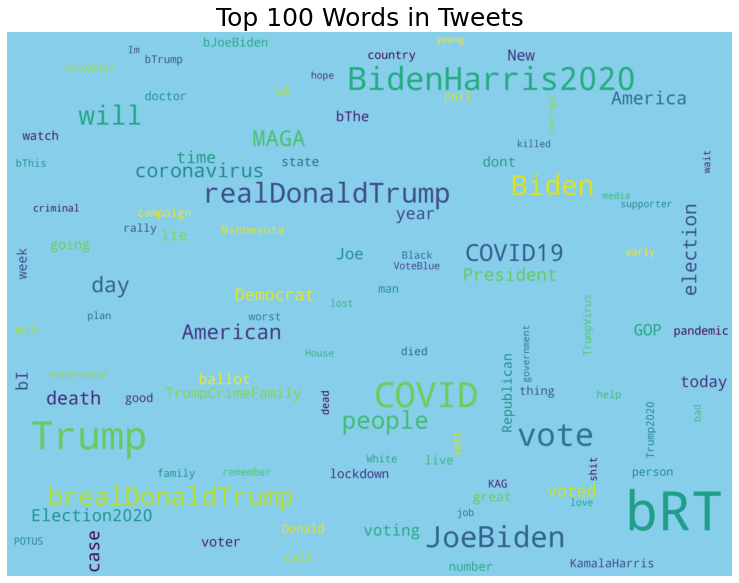

In [48]:
# Visualizing Top text in Tweet
cleaned_tweet = df_election_us_clean['clean']
str_cleaned_tweet = ' '.join([''.join(elems) for elems in cleaned_tweet])
# Google Collab for some reason had issue at this point worked fine on mine
try:
    wordcloud = WordCloud(max_font_size=300,max_words=500,width = 4000,min_word_length=2, background_color="skyblue",height = 3000,collocations=False).generate(str_cleaned_tweet)
except:
     wordcloud = WordCloud(max_font_size=300,max_words=500,width = 4000, background_color="skyblue",height = 3000,collocations=False).generate(str_cleaned_tweet)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Top 500 Words in Tweets',fontsize=25)
plt.axis("off")
plt.show()

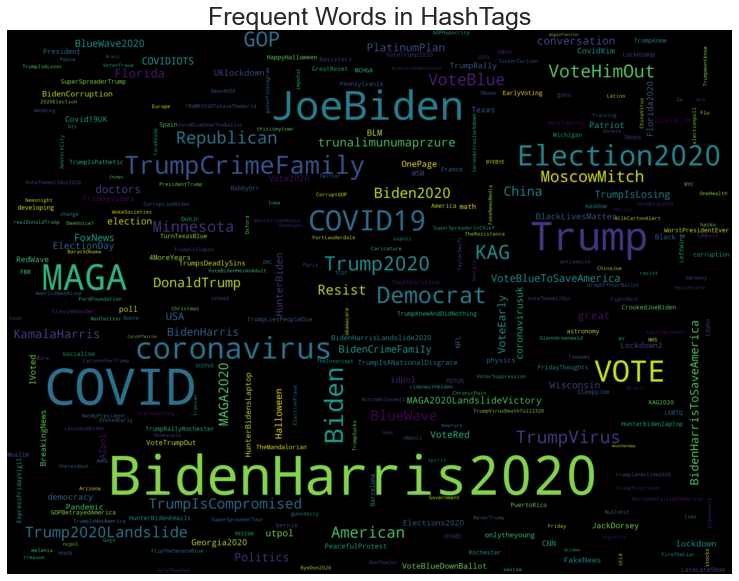

In [626]:
# Visualizing Top 100 hashtags in Tweet
hashtag = df_election_us_clean['hashtags_all']
str_hashtag = ' '.join([''.join(elems) for elems in hashtag])

# Doing this for Google collab issue
try:
    wordcloud = WordCloud(max_font_size=300,max_words=300,width = 4000,min_word_length=2, height = 3000,collocations=False).generate(str_hashtag)
except:
     wordcloud = WordCloud(max_font_size=300,max_words=300,width = 4000, height = 3000,collocations=False).generate(str_hashtag)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Frequent Words in HashTags',fontsize=25)
plt.axis("off")
plt.show()

We can see the BidenHarris 2020 was a popular word along with Trump, Covid, JoeBiden, GOP, Election2020, etc.

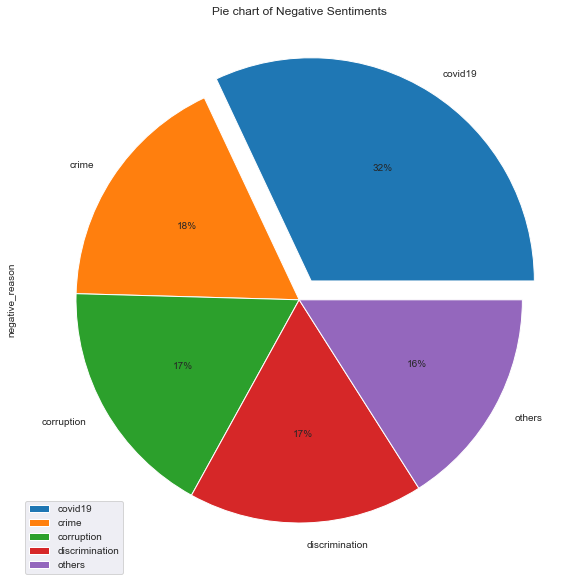

In [620]:
# Visualizing split in data based on Negative Sentiment
df_negative = df_election_us_clean["negative_reason"].value_counts().reset_index()
label =  df_negative["index"]
df_negative.plot.pie(y = 'negative_reason',figsize=(10,15), labels=label,explode=(0.1, 0,0, 0, 0),autopct='%.0f%%')
plt.title("Pie chart of Negative Sentiments")
plt.show()

we can see from the pie graph that Covid19 has been the major reason behind negative sentiment. However, other reasons are similar in percentage.

# 4. Model Preparation

Split the generic tweets randomly into training data (70%) and test data (30%). Prepare the data to try multiple classification algorithms (logistic regression, k-NN, Naive Bayes, SVM, decision trees, ensembles (RF, XGBoost)), where each tweet is considered a single observation/example. In these models, the target variable is the sentiment value, which is either positive or negative. Try two different types of features, Bag of Words (word frequency) and TF-IDF. (Hint: Be careful about when to split the dataset into training and testing set)


WE WILL PREPARE THE TWO DATASETS FOR TF_IDF and BAG OF WORDS Features.

## File :Sentiment_analysis.cvs

In [51]:
df_sentiment_a_clean.head()

,ID,text,label,clean,twitter_handles,hashtags_all
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeders Crown Super Sunday,1,Josh Jenkins forward TAB Breeders Crown Super Sunday,,
1,7.680980e+17,RT MianUsmanJaved Congratulations Pakistan on becoming No1TestTeam in the world against all odds JI_PakZindabadRallies,1,RT MianUsmanJaved Congratulations Pakistan No1TestTeam odds JI_PakZindabadRallies,@MianUsmanJaved,#No1TestTeam #JI_PakZindabadRallies
2,7.680980e+17,RT PEPalerts This September YESmag is taking you to Maine Mendozas surprise thanksgiving party she threw for her fans,1,RT PEPalerts This September YESmag Maine Mendozas surprise thanksgiving party threw fans,@PEPalerts @YESmag,
3,7.680980e+17,RT david_gaibis Newly painted walls thanks a million to our custodial painters this summer Great job ladiesEC_proud,1,RT david_gaibis Newly painted walls custodial painters summer Great job ladiesEC_proud,@david_gaibis,#EC_proud
4,7.680980e+17,RT CedricFeschotte Excited to announce as of July 2017 Feschotte lab will be relocating to Cornell MBG,1,RT CedricFeschotte Excited July 2017 Feschotte lab will relocating Cornell MBG,@CedricFeschotte @Cornell,


In [52]:
# Selecting Target Variable
X1 = df_sentiment_a_clean[['clean']]
X1.head()

,clean
0,Josh Jenkins forward TAB Breeders Crown Super Sunday
1,RT MianUsmanJaved Congratulations Pakistan No1TestTeam odds JI_PakZindabadRallies
2,RT PEPalerts This September YESmag Maine Mendozas surprise thanksgiving party threw fans
3,RT david_gaibis Newly painted walls custodial painters summer Great job ladiesEC_proud
4,RT CedricFeschotte Excited July 2017 Feschotte lab will relocating Cornell MBG


In [53]:
y1 = df_sentiment_a_clean['label']
y1.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

### Feature Type 1: TF-IDF (Term Frequency — Inverse Document Frequency)
applying on clean tweet column

### Splitting the Data First then Vectorizing it

In [89]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1['clean'], y1, random_state=42, test_size=0.3)

In [90]:
#initialize Vectorizer using SCkit Learn TfidfVectorizer function
vectorizer = TfidfVectorizer(analyzer='word')
vectorizer

TfidfVectorizer()

In [94]:
#X1_train

In [95]:
X1_train_vec = vectorizer.fit_transform(X1_train)
X1_test_vec = vectorizer.transform(X1_test)
print(X1_train_vec.shape)
X1_train_vec

(385273, 300490)


<385273x300490 sparse matrix of type '<class 'numpy.float64'>'
	with 2767862 stored elements in Compressed Sparse Row format>

In [96]:
feature_names = vectorizer.get_feature_names()
print(len(feature_names))
feature_names[:5]

300490


['00', '000', '0000', '00007', '00018e']

### Feature Type 2: Bag of Words
### Splitting the Data First then vectorizing it

In [99]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X1['clean'], y1, random_state=42, test_size=0.3)

In [100]:
#initialize Vectorizer using SCkit Learn TfidfVectorizer function
cv = CountVectorizer(binary=True)
cv

CountVectorizer(binary=True)

In [101]:
X2_train_vec = cv.fit_transform(X2_train)
X2_test_vec = cv.transform(X2_test)
print(X2_train_vec.shape)

(385273, 300490)


In [102]:
X2_train_vec.shape

(385273, 300490)

In [104]:
feature_names = cv.get_feature_names()
print(len(feature_names))
feature_names[:5]

300490


['00', '000', '0000', '00007', '00018e']

---
## File: US_Election_2020

### Feature Type 1: TF-IDF (Term Frequency — Inverse Document Frequency)

In [127]:
# Rearranging columns
df_election_us_clean = df_election_us_clean[['text','clean','negative_reason','twitter_handles','hashtags_all','Republican','Democratic','Uncertain','Party','sentiment']]
df_election_us_clean.head(2)

,text,clean,negative_reason,twitter_handles,hashtags_all,Republican,Democratic,Uncertain,Party,sentiment
0,brobreiner so afraid of Nov Dec and Jan Even if BidenHarris2020 has 3 months to do even more damage than he,brobreiner afraid Nov Dec Jan Even BidenHarris2020 3 months damage,covid19,@robreiner,#BidenHarris2020,0,1,0,Democrat,0
1,bRT SueC00K Lord Sumption launches Recovery a new initiative to promote AnotherWay to deal with Covid Hysteria and rushed laws,bRT SueC00K Lord Sumption launches Recovery initiative promote AnotherWay deal Covid Hysteria rushed laws,others,@SueC00K,#AnotherWay #Covid,0,0,1,Uncertain,0


In [128]:
X = df_election_us_clean['clean']
X.head()

0    brobreiner afraid Nov Dec Jan Even BidenHarris2020 3 months damage                                       
1    bRT SueC00K Lord Sumption launches Recovery initiative promote AnotherWay deal Covid Hysteria rushed laws
2    bRT WalidPhares Uber Timing Biden advisors pressure Brazil sanction jairbolsonaro Gov elected            
3    bEvery 107 seconds American dying TrumpVirus nnDonaldTrump thinks                                        
4    bRT thewebbix The Democrats embrace DiversityandInclusion citizens nation Each Vote                      
Name: clean, dtype: object

In [129]:
y = df_election_us_clean['sentiment']

In [433]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [130]:
#initialize Vectorizer using SCkit Learn TfidfVectorizer function
vectorizer = TfidfVectorizer(analyzer='word')
vectorizer

TfidfVectorizer()

In [135]:
X3_train_vec = vectorizer.fit_transform(X3_train)
X3_test_vec = vectorizer.transform(X3_test)
print(X3_train_vec.shape)
X3_train_vec

(1783, 6570)


<1783x6570 sparse matrix of type '<class 'numpy.float64'>'
	with 16313 stored elements in Compressed Sparse Row format>

In [132]:
feature_names = vectorizer.get_feature_names()
print(len(feature_names))
feature_names[:5]

6570


['10', '1000', '100000', '10000000', '1000s']

## File: US_Election_2020
### Feature 2: Bag of Words

In [139]:
# Splitting the data set into 70% Training and 30% Test

X4_train, X4_test, y4_train, y4_test = train_test_split(X, y, random_state=42, test_size=0.3)

We will split the data into input and target variable <br>
we will use the following columns for out input:
* clean

In [140]:
#initialize Vectorizer using SCkit Learn TfidfVectorizer function
cv = CountVectorizer(binary=True)
cv

CountVectorizer(binary=True)

In [141]:
X4_train_vec = cv.fit_transform(X4_train)
X4_test_vec = cv.transform(X4_test)
print(X4_train_vec.shape)
X4_train_vec

(1783, 6570)


<1783x6570 sparse matrix of type '<class 'numpy.int64'>'
	with 16313 stored elements in Compressed Sparse Row format>

# Model Implementation and Tuning
Split the generic tweets randomly into training data (70%) and test data (30%). Prepare the data to try multiple classification algorithms (logistic regression, k-NN, Naive Bayes, SVM, decision trees, ensembles (RF, XGBoost)), where each tweet is considered a single observation/example. In these models, the target variable is the sentiment value, which is either positive or negative. Try two different types of features, Bag of Words (word frequency) and TF-IDF. (Hint: Be careful about when to split the dataset into training and testing set)

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, auc, mean_absolute_error, accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

# File1: Sentinment_analysis

## Logistic Regression (LR) Model

In [142]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(max_iter=1000)
#X1_train = scaler.fit_transform(X1_train)
#X1_test = scaler.transform(X1_test)


In [145]:
# Checcking Accuracy of the model by first predicting on training set
#y_pred = cross_val_predict(model1, X1_train_vec, y1_train, cv = 5)


In [146]:
#acc = accuracy_score(y1_train, y_pred)
#print("Accuracy of the model on training set: ",acc*100)

The model has good accuracy of 96.4%

In [148]:
model1.fit(X1_train_vec, y1_train)
predictions1 = model1.predict(X1_test_vec)
predict_probability = model1.predict_proba(X1_test_vec)

In [149]:
score = accuracy_score(y1_test, predictions1)

print ("\nAccuracy of the model on test set: ",score*100)
print("\nClassification report\n")
print(classification_report(y1_test, predictions1))
print("\nConfusion Matrix")
print (confusion_matrix(y1_test,predictions1))


Accuracy of the model on test set:  96.60424665996439

Classification report

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     53723
           1       0.97      0.97      0.97    111395

    accuracy                           0.97    165118
   macro avg       0.96      0.96      0.96    165118
weighted avg       0.97      0.97      0.97    165118


Confusion Matrix
[[ 50904   2819]
 [  2788 108607]]


## K-NN Model

In [164]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5, n_jobs = -1)

In [165]:
#y_pred = cross_val_predict(model2, X1_train, y1_train, cv = 3)

In [166]:
#acc = accuracy_score(y1_train, y_pred)
#print("Accuracy of the model on training set: ",acc*100)

In [167]:
model2.fit(X1_train_vec, y1_train)


KNeighborsClassifier(n_jobs=-1)

In [168]:
predictions2 = model2.predict(X1_test_vec)
#predict_probability2 = model2.predict_proba(X1_test_vec)

In [169]:
score = accuracy_score(y1_test, predictions2)

print ("\nAccuracy of the model on test set: ",score*100)
print("\nClassification report\n")
print(classification_report(y1_test, predictions2))
print("\nConfusion Matrix")
print (confusion_matrix(y1_test,predictions2))


Accuracy of the model on test set:  64.70463547281338

Classification report

              precision    recall  f1-score   support

           0       0.48      0.87      0.62     53723
           1       0.89      0.54      0.67    111395

    accuracy                           0.65    165118
   macro avg       0.69      0.70      0.64    165118
weighted avg       0.76      0.65      0.65    165118


Confusion Matrix
[[46637  7086]
 [51193 60202]]


## Naive Bayes Model

In [154]:
from sklearn.naive_bayes import MultinomialNB
model3 = MultinomialNB()

In [155]:
#y_pred = cross_val_predict(model3, X1_train, y1_train, cv = 3)

In [156]:
#acc = accuracy_score(y1_train, y_pred)
#print("Accuracy of the model on training set: ",acc*100)

In [158]:
model3.fit(X1_train_vec, y1_train)


MultinomialNB()

In [159]:
predictions3 = model3.predict(X1_test_vec)
predict_probability = model3.predict_proba(X1_test_vec)

In [160]:
score = accuracy_score(y1_test, predictions3)

print ("\nAccuracy of the model on test set: ",score*100)
print("\nClassification report\n")
print(classification_report(y1_test, predictions3))
print("\nConfusion Matrix")
print (confusion_matrix(y1_test,predictions3))


Accuracy of the model on test set:  91.48124371661478

Classification report

              precision    recall  f1-score   support

           0       0.96      0.77      0.85     53723
           1       0.90      0.98      0.94    111395

    accuracy                           0.91    165118
   macro avg       0.93      0.88      0.90    165118
weighted avg       0.92      0.91      0.91    165118


Confusion Matrix
[[ 41373  12350]
 [  1716 109679]]


# Support Vector Machine (SVM) Model

In [150]:
from sklearn.svm import SVC
model4 = SVC(max_iter = 10000)

In [151]:
#y_pred = cross_val_predict(model4, X1_train, y1_train, cv = 3)

In [152]:
#acc = accuracy_score(y1_train, y_pred)
#print("Accuracy of the model on training set: ",acc*100)

In [161]:
model4.fit(X1_train_vec, y1_train)

C:\Users\tua_f\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC(max_iter=10000)

In [162]:
predictions4 = model4.predict(X1_test_vec)
#predict_probability = model4.predict_proba(X1_test)

In [163]:
score = accuracy_score(y1_test, predictions4)

print ("\nAccuracy of the model on test set: ",score*100)
print("\nClassification report\n")
print(classification_report(y1_test, predictions4))
print("\nConfusion Matrix")
print (confusion_matrix(y1_test,predictions4))


Accuracy of the model on test set:  95.90595816325295

Classification report

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     53723
           1       0.97      0.97      0.97    111395

    accuracy                           0.96    165118
   macro avg       0.95      0.95      0.95    165118
weighted avg       0.96      0.96      0.96    165118


Confusion Matrix
[[ 50573   3150]
 [  3610 107785]]


## Decision Trees Model

In [186]:
from sklearn import tree
model5 = tree.DecisionTreeClassifier()

In [187]:
#y_pred = cross_val_predict(model5, X1_train, y1_train, cv = 3)

In [188]:
#acc = accuracy_score(y1_train, y_pred)
#print("Accuracy of the model on training set: ",acc*100)

In [189]:
model5.fit(X1_train_vec, y1_train)


DecisionTreeClassifier()

In [190]:
predictions5 = model5.predict(X1_test_vec)
#predict_probability5 = model5.predict_proba(X1_test)

In [191]:
score = accuracy_score(y1_test, predictions5)

print ("\nAccuracy of the model on test set: ",score*100)
print("\nClassification report\n")
print(classification_report(y1_test, predictions5))
print("\nConfusion Matrix")
print (confusion_matrix(y1_test,predictions5))


Accuracy of the model on test set:  93.36474521251469

Classification report

              precision    recall  f1-score   support

           0       0.89      0.90      0.90     53723
           1       0.95      0.95      0.95    111395

    accuracy                           0.93    165118
   macro avg       0.92      0.93      0.92    165118
weighted avg       0.93      0.93      0.93    165118


Confusion Matrix
[[ 48545   5178]
 [  5778 105617]]


# Ensemble (Random Forest) Model

In [170]:
from sklearn.ensemble import RandomForestClassifier
model6 = RandomForestClassifier(n_estimators=10,n_jobs = 8)

In [171]:
#y_pred = cross_val_predict(model5, X1_train, y1_train, cv = 3)

In [172]:
#acc = accuracy_score(y1_train, y_pred)
#print("Accuracy of the model on training set: ",acc*100)

In [173]:
model6.fit(X1_train_vec, y1_train)


RandomForestClassifier(n_estimators=10, n_jobs=8)

In [174]:
predictions6 = model6.predict(X1_test_vec)
#predict_probability = model6.predict_proba(X1_test)

In [175]:
score = accuracy_score(y1_test, predictions6)

print ("\nAccuracy of the model on test set: ",score*100)
print("\nClassification report\n")
print(classification_report(y1_test, predictions6))
print("\nConfusion Matrix")
print (confusion_matrix(y1_test,predictions6))


Accuracy of the model on test set:  94.57781707627274

Classification report

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     53723
           1       0.97      0.95      0.96    111395

    accuracy                           0.95    165118
   macro avg       0.93      0.94      0.94    165118
weighted avg       0.95      0.95      0.95    165118


Confusion Matrix
[[ 50405   3318]
 [  5635 105760]]


## Ensemble(XGBoost) Model

In [199]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
model7 = GradientBoostingClassifier(max_depth = 3,n_estimators = 4,random_state = 5,criterion = "mse",learning_rate = 1)

In [200]:
#y_pred = cross_val_predict(model7, X1_train, y1_train, cv = 2)

In [201]:
#acc = accuracy_score(y1_train, y_pred)
#print("Accuracy of the model on training set: ",acc*100)

In [202]:
model7.fit(X1_train_vec, y1_train)

GradientBoostingClassifier(criterion='mse', learning_rate=1, n_estimators=4,
                           random_state=5)

In [203]:
predictions7 = model7.predict(X1_test_vec)
#predict_probability = model7.predict_proba(X1_test_vec)

In [204]:
predictions7[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [205]:
score = accuracy_score(y1_test, predictions7)

print ("\nAccuracy of the model on test set: ",score*100)
print("\nClassification report\n")
print(classification_report(y1_test, predictions7))
print("\nConfusion Matrix")
print (confusion_matrix(y1_test,predictions7))


Accuracy of the model on test set:  70.11288896425587

Classification report

              precision    recall  f1-score   support

           0       0.86      0.10      0.17     53723
           1       0.69      0.99      0.82    111395

    accuracy                           0.70    165118
   macro avg       0.78      0.54      0.50    165118
weighted avg       0.75      0.70      0.61    165118


Confusion Matrix
[[  5190  48533]
 [   816 110579]]


### Top 3 Models

Looking at the results of accuracy for the 7 models we can see that Logistic Regression, KNN, SVM, Decision Tree and Random Forest had accuracy above 90%. Logistic Regresion, SVM and Random Forest had the highes score.

## USING BAG OF WORDS on File1: Sentimental_Analysis.csv

# Logistic Regression

In [209]:
from sklearn.linear_model import LogisticRegression
model12 = LogisticRegression(max_iter=1000)
#X1_train = scaler.fit_transform(X1_train)
#X1_test = scaler.transform(X1_test)

In [210]:
model12.fit(X2_train_vec, y2_train)
predictions12 = model1.predict(X2_test_vec)
#predict_probability = model2.predict_proba(X2_test_vec)

In [211]:
score = accuracy_score(y2_test, predictions12)

print ("\nAccuracy of the model on test set: ",score*100)
print("\nClassification report\n")
print(classification_report(y2_test, predictions12))
print("\nConfusion Matrix")
print (confusion_matrix(y2_test,predictions12))


Accuracy of the model on test set:  94.51664869971778

Classification report

              precision    recall  f1-score   support

           0       0.95      0.87      0.91     53723
           1       0.94      0.98      0.96    111395

    accuracy                           0.95    165118
   macro avg       0.95      0.93      0.94    165118
weighted avg       0.95      0.95      0.94    165118


Confusion Matrix
[[ 46943   6780]
 [  2274 109121]]


# KNN Model

In [228]:
from sklearn.neighbors import KNeighborsClassifier
model22 = KNeighborsClassifier(n_neighbors=5, n_jobs = -1)

In [229]:
model22.fit(X2_train_vec, y2_train)

KNeighborsClassifier(n_jobs=-1)

In [230]:
predictions22 = model22.predict(X2_test_vec)
#predict_probability2 = model2.predict_proba(X2_test_vec)

In [231]:
score = accuracy_score(y2_test, predictions22)

print ("\nAccuracy of the model on test set: ",score*100)
print("\nClassification report\n")
print(classification_report(y2_test, predictions22))
print("\nConfusion Matrix")
print (confusion_matrix(y2_test,predictions22))


Accuracy of the model on test set:  89.3433786746448

Classification report

              precision    recall  f1-score   support

           0       0.78      0.93      0.85     53723
           1       0.96      0.88      0.92    111395

    accuracy                           0.89    165118
   macro avg       0.87      0.90      0.88    165118
weighted avg       0.90      0.89      0.90    165118


Confusion Matrix
[[49954  3769]
 [13827 97568]]


# Naive Bayes

In [212]:
from sklearn.naive_bayes import MultinomialNB
model32 = MultinomialNB()

In [213]:
model32.fit(X2_train_vec, y2_train)

MultinomialNB()

In [214]:
predictions32 = model32.predict(X2_test_vec)
#predict_probability = model3.predict_proba(X1_test_vec)

In [215]:
score = accuracy_score(y2_test, predictions32)

print ("\nAccuracy of the model on test set: ",score*100)
print("\nClassification report\n")
print(classification_report(y2_test, predictions32))
print("\nConfusion Matrix")
print (confusion_matrix(y2_test,predictions32))


Accuracy of the model on test set:  94.6196053731271

Classification report

              precision    recall  f1-score   support

           0       0.93      0.90      0.92     53723
           1       0.95      0.97      0.96    111395

    accuracy                           0.95    165118
   macro avg       0.94      0.93      0.94    165118
weighted avg       0.95      0.95      0.95    165118


Confusion Matrix
[[ 48275   5448]
 [  3436 107959]]


# SVM Model

In [232]:
from sklearn.svm import SVC
model42 = SVC(max_iter = 10000)

In [233]:
model42.fit(X2_train_vec, y2_train)

C:\Users\tua_f\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC(max_iter=10000)

In [234]:
predictions42 = model42.predict(X2_test_vec)
#predict_probability = model4.predict_proba(X1_test)

In [235]:
score = accuracy_score(y2_test, predictions42)

print ("\nAccuracy of the model on test set: ",score*100)
print("\nClassification report\n")
print(classification_report(y2_test, predictions42))
print("\nConfusion Matrix")
print (confusion_matrix(y2_test,predictions42))


Accuracy of the model on test set:  95.85447982654829

Classification report

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     53723
           1       0.97      0.97      0.97    111395

    accuracy                           0.96    165118
   macro avg       0.95      0.95      0.95    165118
weighted avg       0.96      0.96      0.96    165118


Confusion Matrix
[[ 49876   3847]
 [  2998 108397]]


# Decision Tree Model

In [216]:
from sklearn import tree
model52 = tree.DecisionTreeClassifier()

In [217]:
model52.fit(X2_train_vec, y2_train)

DecisionTreeClassifier()

In [218]:
predictions52 = model52.predict(X2_test_vec)
#predict_probability5 = model5.predict_proba(X1_test)

In [219]:
score = accuracy_score(y2_test, predictions52)

print ("\nAccuracy of the model on test set: ",score*100)
print("\nClassification report\n")
print(classification_report(y2_test, predictions52))
print("\nConfusion Matrix")
print (confusion_matrix(y2_test,predictions52))


Accuracy of the model on test set:  93.76506498382975

Classification report

              precision    recall  f1-score   support

           0       0.90      0.91      0.90     53723
           1       0.96      0.95      0.95    111395

    accuracy                           0.94    165118
   macro avg       0.93      0.93      0.93    165118
weighted avg       0.94      0.94      0.94    165118


Confusion Matrix
[[ 48805   4918]
 [  5377 106018]]


# Ensemble (Random Forest) Model

In [220]:
from sklearn.ensemble import RandomForestClassifier
model62 = RandomForestClassifier(n_estimators=10,n_jobs = 8)

In [221]:
model62.fit(X2_train_vec, y2_train)

RandomForestClassifier(n_estimators=10, n_jobs=8)

In [222]:
predictions62 = model62.predict(X2_test_vec)
#predict_probability = model6.predict_proba(X1_test)

In [223]:
score = accuracy_score(y2_test, predictions62)

print ("\nAccuracy of the model on test set: ",score*100)
print("\nClassification report\n")
print(classification_report(y2_test, predictions62))
print("\nConfusion Matrix")
print (confusion_matrix(y2_test,predictions62))


Accuracy of the model on test set:  94.69046378953233

Classification report

              precision    recall  f1-score   support

           0       0.90      0.95      0.92     53723
           1       0.97      0.95      0.96    111395

    accuracy                           0.95    165118
   macro avg       0.93      0.95      0.94    165118
weighted avg       0.95      0.95      0.95    165118


Confusion Matrix
[[ 50789   2934]
 [  5833 105562]]


# Ensemble (XGBoost) Model

In [224]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
model72 = GradientBoostingClassifier(max_depth = 3,n_estimators = 4,random_state = 5,criterion = "mse",learning_rate = 1)

In [225]:
model72.fit(X2_train_vec, y2_train)

GradientBoostingClassifier(criterion='mse', learning_rate=1, n_estimators=4,
                           random_state=5)

In [226]:
predictions72 = model72.predict(X2_test_vec)
#predict_probability = model7.predict_proba(X1_test_vec)

In [227]:
score = accuracy_score(y2_test, predictions72)

print ("\nAccuracy of the model on test set: ",score*100)
print("\nClassification report\n")
print(classification_report(y2_test, predictions72))
print("\nConfusion Matrix")
print (confusion_matrix(y2_test,predictions72))


Accuracy of the model on test set:  70.1134945917465

Classification report

              precision    recall  f1-score   support

           0       0.87      0.10      0.17     53723
           1       0.69      0.99      0.82    111395

    accuracy                           0.70    165118
   macro avg       0.78      0.54      0.50    165118
weighted avg       0.75      0.70      0.61    165118


Confusion Matrix
[[  5172  48551]
 [   797 110598]]


## Top 3 Models

We can see from the result of the accuracy that Logistic Regression, Naive Bayes, Random Forest, Decision Tree and SVM perormed the best. With Top Three models being Logistic regression, SVM and tie for 3rd place between Naive Bayes and Random Forest. 


## File2: US Election 2020

### Predicting using TF-IDF

In [246]:
# Specifying all models
#Logistic Regression
model13 = LogisticRegression(max_iter=1000)
#KNN
model23 = KNeighborsClassifier(n_neighbors=5, n_jobs = -1)
#Naive Bayes
model33 = MultinomialNB()
#SVM
model43 = SVC(max_iter = 10000)
#Decision Tree
model53 = tree.DecisionTreeClassifier()
#Random Forest
model63 = RandomForestClassifier(n_estimators=10,n_jobs = 8)
#(XGBOOST)
model73 = GradientBoostingClassifier(max_depth = 3,n_estimators = 4,random_state = 5,criterion = "mse",learning_rate = 1)

In [248]:
# Fitting all Models together

model13.fit(X3_train_vec, y3_train)
model23.fit(X3_train_vec, y3_train)
model33.fit(X3_train_vec, y3_train)
model43.fit(X3_train_vec, y3_train)
model53.fit(X3_train_vec, y3_train)
model63.fit(X3_train_vec, y3_train)
model73.fit(X3_train_vec, y3_train)


GradientBoostingClassifier(criterion='mse', learning_rate=1, n_estimators=4,
                           random_state=5)

## Logistic Regression

In [249]:
predictions13 = model13.predict(X3_test_vec)

In [250]:
score = accuracy_score(y3_test, predictions13)

print ("\nAccuracy of the model on test set: ",score*100)
print("\nClassification report\n")
print(classification_report(y3_test, predictions13))
print("\nConfusion Matrix")
print (confusion_matrix(y3_test,predictions13))


Accuracy of the model on test set:  71.76470588235294

Classification report

              precision    recall  f1-score   support

           0       0.72      0.70      0.71       379
           1       0.71      0.74      0.72       386

    accuracy                           0.72       765
   macro avg       0.72      0.72      0.72       765
weighted avg       0.72      0.72      0.72       765


Confusion Matrix
[[265 114]
 [102 284]]


## KNN Model

In [259]:
predictions23 = model23.predict(X3_test_vec)

In [260]:
score = accuracy_score(y3_test, predictions23)

print ("\nAccuracy of the model on test set: ",score*100)
print("\nClassification report\n")
print(classification_report(y3_test, predictions23))
print("\nConfusion Matrix")
print (confusion_matrix(y3_test,predictions23))


Accuracy of the model on test set:  62.22222222222222

Classification report

              precision    recall  f1-score   support

           0       0.69      0.44      0.53       379
           1       0.59      0.80      0.68       386

    accuracy                           0.62       765
   macro avg       0.64      0.62      0.61       765
weighted avg       0.64      0.62      0.61       765


Confusion Matrix
[[166 213]
 [ 76 310]]


## Navie Bayes

In [251]:
predictions33 = model33.predict(X3_test_vec)

In [252]:
score = accuracy_score(y3_test, predictions33)

print ("\nAccuracy of the model on test set: ",score*100)
print("\nClassification report\n")
print(classification_report(y3_test, predictions33))
print("\nConfusion Matrix")
print (confusion_matrix(y3_test,predictions33))


Accuracy of the model on test set:  72.6797385620915

Classification report

              precision    recall  f1-score   support

           0       0.71      0.76      0.73       379
           1       0.75      0.70      0.72       386

    accuracy                           0.73       765
   macro avg       0.73      0.73      0.73       765
weighted avg       0.73      0.73      0.73       765


Confusion Matrix
[[287  92]
 [117 269]]


## SVM Model

In [261]:
predictions43 = model43.predict(X3_test_vec)

In [262]:
score = accuracy_score(y3_test, predictions43)

print ("\nAccuracy of the model on test set: ",score*100)
print("\nClassification report\n")
print(classification_report(y3_test, predictions43))
print("\nConfusion Matrix")
print (confusion_matrix(y3_test,predictions43))


Accuracy of the model on test set:  71.11111111111111

Classification report

              precision    recall  f1-score   support

           0       0.73      0.66      0.69       379
           1       0.70      0.76      0.73       386

    accuracy                           0.71       765
   macro avg       0.71      0.71      0.71       765
weighted avg       0.71      0.71      0.71       765


Confusion Matrix
[[250 129]
 [ 92 294]]


## Decision Tree Model

In [257]:
predictions53 = model53.predict(X3_test_vec)

In [258]:
score = accuracy_score(y3_test, predictions53)

print ("\nAccuracy of the model on test set: ",score*100)
print("\nClassification report\n")
print(classification_report(y3_test, predictions53))
print("\nConfusion Matrix")
print (confusion_matrix(y3_test,predictions53))


Accuracy of the model on test set:  64.31372549019608

Classification report

              precision    recall  f1-score   support

           0       0.67      0.55      0.60       379
           1       0.62      0.73      0.67       386

    accuracy                           0.64       765
   macro avg       0.65      0.64      0.64       765
weighted avg       0.65      0.64      0.64       765


Confusion Matrix
[[209 170]
 [103 283]]


## Ensemble (Random Forest) Model

In [253]:
predictions63 = model63.predict(X3_test_vec)

In [254]:
score = accuracy_score(y3_test, predictions63)

print ("\nAccuracy of the model on test set: ",score*100)
print("\nClassification report\n")
print(classification_report(y3_test, predictions63))
print("\nConfusion Matrix")
print (confusion_matrix(y3_test,predictions63))


Accuracy of the model on test set:  68.10457516339869

Classification report

              precision    recall  f1-score   support

           0       0.71      0.59      0.65       379
           1       0.66      0.77      0.71       386

    accuracy                           0.68       765
   macro avg       0.69      0.68      0.68       765
weighted avg       0.69      0.68      0.68       765


Confusion Matrix
[[225 154]
 [ 90 296]]


## Ensemble (XGBoost) Model

In [255]:
predictions73 = model73.predict(X3_test_vec)

In [256]:
score = accuracy_score(y3_test, predictions73)

print ("\nAccuracy of the model on test set: ",score*100)
print("\nClassification report\n")
print(classification_report(y3_test, predictions73))
print("\nConfusion Matrix")
print (confusion_matrix(y3_test,predictions73))


Accuracy of the model on test set:  57.124183006535944

Classification report

              precision    recall  f1-score   support

           0       0.92      0.15      0.25       379
           1       0.54      0.99      0.70       386

    accuracy                           0.57       765
   macro avg       0.73      0.57      0.48       765
weighted avg       0.73      0.57      0.48       765


Confusion Matrix
[[ 56 323]
 [  5 381]]


## Models Evaluation

Looking at the model we can see that all models performed poorly comparede to the Sentiment_analysis file models. Top three models had the accuracy in 70%+ however they were lower than 75%.
<br>
The Top three models are 
* Naive Bayes
* Logistic Regression
* Support Vector Machine

# File 2: US Election 2020
## Predicting Using Bag of Words

In [263]:
# Specifying all models
#Logistic Regression
model14 = LogisticRegression(max_iter=1000)
#KNN
model24 = KNeighborsClassifier(n_neighbors=5, n_jobs = -1)
#Naive Bayes
model34 = MultinomialNB()
#SVM
model44 = SVC(max_iter = 10000)
#Decision Tree
model54 = tree.DecisionTreeClassifier()
#Random Forest
model64 = RandomForestClassifier(n_estimators=10,n_jobs = 8)
#(XGBOOST)
model74 = GradientBoostingClassifier(max_depth = 3,n_estimators = 4,random_state = 5,criterion = "mse",learning_rate = 1)

In [266]:
# Fitting all Models together

#Logistic Regression
model14.fit(X4_train_vec, y4_train)
#KNN
model24.fit(X4_train_vec, y4_train)
#Naive Bayes
model34.fit(X4_train_vec, y4_train)
#SVM
model44.fit(X4_train_vec, y4_train)
#Decision Tree
model54.fit(X4_train_vec, y4_train)
#Random Forest
model64.fit(X4_train_vec, y4_train)
#Ensemble (XGBOOST)
model74.fit(X4_train_vec, y4_train)


GradientBoostingClassifier(criterion='mse', learning_rate=1, n_estimators=4,
                           random_state=5)

In [267]:
# Setting Predictions for all 7 Models together

#Logistic Regression
predictions14 = model14.predict(X4_test_vec)
#KNN
predictions24 = model24.predict(X4_test_vec)
#Naive Bayes
predictions34 = model34.predict(X4_test_vec)
#SVM
predictions44 = model44.predict(X4_test_vec)
#Decision Tree
predictions54 = model54.predict(X4_test_vec)
#Random Forest
predictions64 = model64.predict(X4_test_vec)
#Ensemble (XGBoost)
predictions74 = model74.predict(X4_test_vec)

**Looking at results*
## Logistic Regression

In [268]:
score = accuracy_score(y4_test, predictions14)

print ("\nAccuracy of the model on test set: ",score*100)
print("\nClassification report\n")
print(classification_report(y4_test, predictions14))
print("\nConfusion Matrix")
print (confusion_matrix(y4_test,predictions14))


Accuracy of the model on test set:  72.94117647058823

Classification report

              precision    recall  f1-score   support

           0       0.76      0.66      0.71       379
           1       0.70      0.80      0.75       386

    accuracy                           0.73       765
   macro avg       0.73      0.73      0.73       765
weighted avg       0.73      0.73      0.73       765


Confusion Matrix
[[249 130]
 [ 77 309]]


## KNN Model

In [269]:
score = accuracy_score(y4_test, predictions24)

print ("\nAccuracy of the model on test set: ",score*100)
print("\nClassification report\n")
print(classification_report(y4_test, predictions24))
print("\nConfusion Matrix")
print (confusion_matrix(y4_test,predictions24))


Accuracy of the model on test set:  51.503267973856204

Classification report

              precision    recall  f1-score   support

           0       0.90      0.02      0.05       379
           1       0.51      1.00      0.67       386

    accuracy                           0.52       765
   macro avg       0.70      0.51      0.36       765
weighted avg       0.70      0.52      0.36       765


Confusion Matrix
[[  9 370]
 [  1 385]]


## Naive Bayes Model

In [270]:
score = accuracy_score(y4_test, predictions34)

print ("\nAccuracy of the model on test set: ",score*100)
print("\nClassification report\n")
print(classification_report(y4_test, predictions34))
print("\nConfusion Matrix")
print (confusion_matrix(y4_test,predictions34))


Accuracy of the model on test set:  73.0718954248366

Classification report

              precision    recall  f1-score   support

           0       0.71      0.77      0.74       379
           1       0.76      0.69      0.72       386

    accuracy                           0.73       765
   macro avg       0.73      0.73      0.73       765
weighted avg       0.73      0.73      0.73       765


Confusion Matrix
[[293  86]
 [120 266]]


## SVM Model

In [271]:
score = accuracy_score(y4_test, predictions44)

print ("\nAccuracy of the model on test set: ",score*100)
print("\nClassification report\n")
print(classification_report(y4_test, predictions44))
print("\nConfusion Matrix")
print (confusion_matrix(y4_test, predictions44))


Accuracy of the model on test set:  69.15032679738562

Classification report

              precision    recall  f1-score   support

           0       0.82      0.48      0.61       379
           1       0.64      0.90      0.75       386

    accuracy                           0.69       765
   macro avg       0.73      0.69      0.68       765
weighted avg       0.73      0.69      0.68       765


Confusion Matrix
[[182 197]
 [ 39 347]]


## Decision Tree Model

In [272]:
score = accuracy_score(y4_test, predictions54)

print ("\nAccuracy of the model on test set: ",score*100)
print("\nClassification report\n")
print(classification_report(y4_test, predictions54))
print("\nConfusion Matrix")
print (confusion_matrix(y4_test,predictions54))


Accuracy of the model on test set:  69.93464052287581

Classification report

              precision    recall  f1-score   support

           0       0.76      0.58      0.66       379
           1       0.66      0.82      0.73       386

    accuracy                           0.70       765
   macro avg       0.71      0.70      0.69       765
weighted avg       0.71      0.70      0.69       765


Confusion Matrix
[[219 160]
 [ 70 316]]


## Ensemble Random Forest Model

In [273]:
score = accuracy_score(y4_test, predictions64)

print ("\nAccuracy of the model on test set: ",score*100)
print("\nClassification report\n")
print(classification_report(y4_test, predictions64))
print("\nConfusion Matrix")
print (confusion_matrix(y4_test,predictions64))


Accuracy of the model on test set:  70.45751633986929

Classification report

              precision    recall  f1-score   support

           0       0.75      0.60      0.67       379
           1       0.67      0.80      0.73       386

    accuracy                           0.70       765
   macro avg       0.71      0.70      0.70       765
weighted avg       0.71      0.70      0.70       765


Confusion Matrix
[[229 150]
 [ 76 310]]


## Ensemble XGBOost

In [274]:
score = accuracy_score(y4_test, predictions74)

print ("\nAccuracy of the model on test set: ",score*100)
print("\nClassification report\n")
print(classification_report(y4_test, predictions74))
print("\nConfusion Matrix")
print (confusion_matrix(y4_test,predictions74))


Accuracy of the model on test set:  57.25490196078431

Classification report

              precision    recall  f1-score   support

           0       0.89      0.16      0.27       379
           1       0.54      0.98      0.70       386

    accuracy                           0.57       765
   macro avg       0.72      0.57      0.48       765
weighted avg       0.72      0.57      0.48       765


Confusion Matrix
[[ 59 320]
 [  7 379]]


## Model Evaluations

Looking at the accuracy of the 7 Models we can infer that Naive Bayes performed the best followed by Logistic Regression (LR) then Random Forest. We will select these for the next part of the question.

<br>
Also we noticed the results in Bag of Words feature Vectorization were the best hence we will be using those for the next part

## Visualizing best model

In [560]:
from sklearn.model_selection import GridSearchCV

In [561]:
pred_dict = {'Actual':y4_test,
             'Prediction': predictions34
            }

In [562]:
df_best_model = pd.DataFrame(pred_dict)
df_best_model.reset_index(inplace = True)
df_best_model.drop(columns = 'index', axis =1, inplace = True)
df_best_model['difference'] = abs(df_best_model['Actual']-df_best_model['Prediction'])
df_best_model.head(3)

,Actual,Prediction,difference
0,0,0,0
1,1,1,0
2,0,0,0


In [563]:
df_best_model['Actual'].value_counts()

1    386
0    379
Name: Actual, dtype: int64

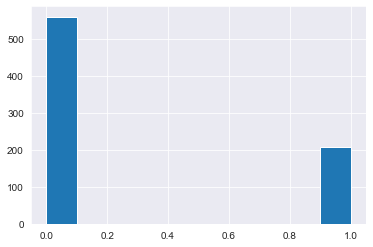

In [564]:
df_best_model['difference'].hist()

We can see that there ar more than 200 values values that were wongly predicted by our best model

# 4. Model Implementation Part 2 
## Predict reason for negative sentiments

In [565]:
print(df_election_us_clean.shape)
df_election_us_clean.head(2)

(2548, 10)


,text,clean,negative_reason,twitter_handles,hashtags_all,Republican,Democratic,Uncertain,Party,sentiment
0,brobreiner so afraid of Nov Dec and Jan Even if BidenHarris2020 has 3 months to do even more damage than he,brobreiner afraid Nov Dec Jan Even BidenHarris2020 3 months damage,covid19,@robreiner,#BidenHarris2020,0,1,0,Democrat,0
1,bRT SueC00K Lord Sumption launches Recovery a new initiative to promote AnotherWay to deal with Covid Hysteria and rushed laws,bRT SueC00K Lord Sumption launches Recovery initiative promote AnotherWay deal Covid Hysteria rushed laws,others,@SueC00K,#AnotherWay #Covid,0,0,1,Uncertain,0


In [566]:
df_election_neg = df_election_us_clean[df_election_us_clean['sentiment']==0]
df_election_neg.shape

(1263, 10)

In [567]:
df_election_neg.head(3)

,text,clean,negative_reason,twitter_handles,hashtags_all,Republican,Democratic,Uncertain,Party,sentiment
0,brobreiner so afraid of Nov Dec and Jan Even if BidenHarris2020 has 3 months to do even more damage than he,brobreiner afraid Nov Dec Jan Even BidenHarris2020 3 months damage,covid19,@robreiner,#BidenHarris2020,0,1,0,Democrat,0
1,bRT SueC00K Lord Sumption launches Recovery a new initiative to promote AnotherWay to deal with Covid Hysteria and rushed laws,bRT SueC00K Lord Sumption launches Recovery initiative promote AnotherWay deal Covid Hysteria rushed laws,others,@SueC00K,#AnotherWay #Covid,0,0,1,Uncertain,0
2,bRT WalidPhares Uber Timing after Biden advisors said they would put pressure on Brazil sanction jairbolsonaro Gov when elected,bRT WalidPhares Uber Timing Biden advisors pressure Brazil sanction jairbolsonaro Gov elected,covid19,@WalidPhares @jairbolsonaro,#Biden #Brazil,0,1,0,Democrat,0


In [568]:
X5 = df_election_neg['clean']
Y5 =df_election_neg['negative_reason']


In [569]:
Y_unique = Y5.unique()
Y_unique

array(['covid19', 'others', 'discrimination', 'corruption', 'crime'],
      dtype=object)

In [570]:
from sklearn import preprocessing
label_encode = preprocessing.LabelEncoder()
label_encode.fit(Y_unique)

LabelEncoder()

In [571]:
label_encode.classes_

array(['corruption', 'covid19', 'crime', 'discrimination', 'others'],
      dtype=object)

In [572]:
Y_5 = label_encode.transform(Y5)
Y_5

array([1, 4, 1, ..., 1, 1, 1])

### Using Bag of Words


In [573]:
# Splitting the data set into 70% Training and 30% Test

X5_train, X5_test, y5_train, y5_test = train_test_split(X5, Y_5, random_state=42, test_size=0.3)

In [574]:
#initialize Vectorizer using SCkit Learn TfidfVectorizer function
cv = CountVectorizer(binary=True)
cv

CountVectorizer(binary=True)

In [575]:
X5_train_vec = cv.fit_transform(X5_train)
X5_test_vec = cv.transform(X5_test)
print(X5_train_vec.shape)
X5_train_vec

(884, 3916)


<884x3916 sparse matrix of type '<class 'numpy.int64'>'
	with 8507 stored elements in Compressed Sparse Row format>

In [576]:
# Using 3 models

#Logistic Regression
model15 = LogisticRegression(max_iter=1000)

#Naive Bayes
model35 = MultinomialNB()

#Random Forest
model65 = RandomForestClassifier(random_state = 1, n_estimators = 10, min_samples_split = 1,n_jobs = 8)


In [577]:
C = [0.001,0.01,0.1,0.5,1,5,10]
solver = ['newton-cg','lbfgs','liblinear']

hyperLR = dict(C = C, solver = solver)

gridLR = GridSearchCV(model15, hyperLR, cv = 3, verbose = 1)


bestLR = gridLR.fit(X5_train_vec, y5_train)

print(bestLR.best_score_)

print(bestLR.best_estimator_)

Fitting 3 folds for each of 21 candidates, totalling 63 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:  1.3min finished


0.34048195549406196
LogisticRegression(C=0.1, max_iter=1000, solver='newton-cg')


## Hyperparameter Naive Bayes

In [578]:
alpha = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1]

hyperNB = dict(alpha = alpha)
gridNB = GridSearchCV(estimator=model35,param_grid=hyperNB,cv = 3,verbose=True)


bestNB = gridNB.fit(X5_train_vec, y5_train)

print(gridNB.best_score_)

print(gridNB.best_estimator_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
0.32128060263653485
MultinomialNB(alpha=1)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.0s finished


In [579]:
### HyperParameter Tuning Random Forest

In [580]:
from sklearn.model_selection import GridSearchCV
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperForest = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridForest = GridSearchCV(model65, hyperForest, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestForest = gridForest.fit(X5_train_vec, y5_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  3.6min finished


In [581]:
'''# Fitting all Models together

#Logistic Regression
model15.fit(X5_train_vec, y5_train)

#Naive Bayes
model35.fit(X5_train_vec, y5_train)

#Random Forest
model65.fit(X5_train_vec, y5_train)'''



'# Fitting all Models together\n\n#Logistic Regression\nmodel15.fit(X5_train_vec, y5_train)\n\n#Naive Bayes\nmodel35.fit(X5_train_vec, y5_train)\n\n#Random Forest\nmodel65.fit(X5_train_vec, y5_train)'

In [582]:
# Setting Predictions for all 7 Models together

#Logistic Regression
predictions15 = bestLR.predict(X5_test_vec)

#Naive Bayes
predictions35 = bestNB.predict(X5_test_vec)

#Random Forest
predictions65 = bestForest.predict(X5_test_vec)


## Logistic Regression Model

In [583]:
score = accuracy_score(y5_test, predictions15)

print ("\nAccuracy of the model on test set: ",score*100)
print("\nClassification report\n")
print(classification_report(y5_test, predictions15))
print("\nConfusion Matrix")
print (confusion_matrix(y5_test,predictions15))


Accuracy of the model on test set:  33.773087071240106

Classification report

              precision    recall  f1-score   support

           0       0.36      0.06      0.11        65
           1       0.33      0.95      0.49       118
           2       0.67      0.03      0.05        72
           3       0.29      0.08      0.13        62
           4       0.83      0.08      0.15        62

    accuracy                           0.34       379
   macro avg       0.50      0.24      0.18       379
weighted avg       0.48      0.34      0.22       379


Confusion Matrix
[[  4  56   1   4   0]
 [  3 112   0   2   1]
 [  1  64   2   5   0]
 [  2  55   0   5   0]
 [  1  55   0   1   5]]


## Naive Bayes Model

In [584]:
score = accuracy_score(y5_test, predictions35)

print ("\nAccuracy of the model on test set: ",score*100)
print("\nClassification report\n")
print(classification_report(y5_test, predictions35))
print("\nConfusion Matrix")
print (confusion_matrix(y5_test,predictions35))


Accuracy of the model on test set:  34.300791556728235

Classification report

              precision    recall  f1-score   support

           0       0.40      0.18      0.25        65
           1       0.34      0.70      0.46       118
           2       0.35      0.15      0.21        72
           3       0.26      0.19      0.22        62
           4       0.44      0.19      0.27        62

    accuracy                           0.34       379
   macro avg       0.36      0.29      0.28       379
weighted avg       0.36      0.34      0.31       379


Confusion Matrix
[[12 42  2  7  2]
 [ 8 83 10 12  5]
 [ 4 48 11  5  4]
 [ 2 39  5 12  4]
 [ 4 33  3 10 12]]


## Random Forest

In [585]:
score = accuracy_score(y5_test, predictions65)

print ("\nAccuracy of the model on test set: ",score*100)
print("\nClassification report\n")
print(classification_report(y5_test, predictions65))
print("\nConfusion Matrix")
print (confusion_matrix(y5_test,predictions65))


Accuracy of the model on test set:  33.50923482849604

Classification report

              precision    recall  f1-score   support

           0       0.75      0.05      0.09        65
           1       0.32      0.99      0.48       118
           2       1.00      0.01      0.03        72
           3       0.83      0.08      0.15        62
           4       1.00      0.02      0.03        62

    accuracy                           0.34       379
   macro avg       0.78      0.23      0.16       379
weighted avg       0.72      0.34      0.20       379


Confusion Matrix
[[  3  62   0   0   0]
 [  0 117   0   1   0]
 [  0  71   1   0   0]
 [  1  56   0   5   0]
 [  0  61   0   0   1]]


### the accuracy for all three model is very low

In [586]:
pred_m1 = label_encode.inverse_transform(predictions15)
df_m1 = pd.DataFrame(pred_m1, columns = ['negative_reason'])
df_m1.head()

,negative_reason
0,covid19
1,covid19
2,covid19
3,covid19
4,covid19


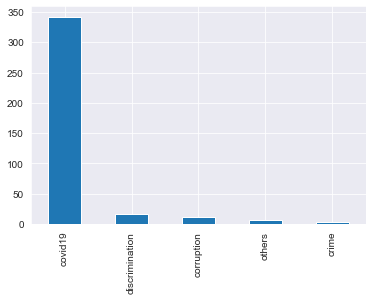

In [587]:
df_m1['negative_reason'].value_counts().plot(kind = 'bar')

### Result:

Looking at the first model we can see that it showed that maximum amount of people that are upset are due to Covid19. while people that are upset due to other causes such as discrimination, corruption are low. However, since the mdoel accuracy was low this can be hard to justify if th predictions are correct or not.

Additionally, 
if political parties are caampaigning they can target these issues to be more align with the voters and win their vote for the 2020 US elections.

In [588]:
pred_m2 = label_encode.inverse_transform(predictions35)
df_m2 = pd.DataFrame(pred_m2, columns = ['negative_reason'])
df_m2.head()

,negative_reason
0,covid19
1,discrimination
2,covid19
3,covid19
4,covid19


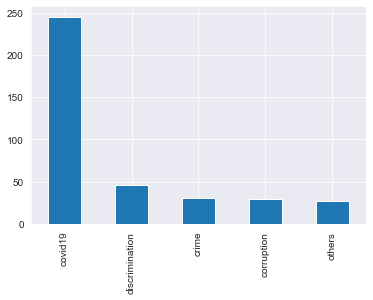

In [589]:
df_m2['negative_reason'].value_counts().plot(kind = 'bar')

In [590]:
pred_m3 = label_encode.inverse_transform(predictions65)
df_m3 = pd.DataFrame(pred_m3, columns = ['negative_reason'])
df_m3.head()

,negative_reason
0,covid19
1,covid19
2,covid19
3,covid19
4,covid19


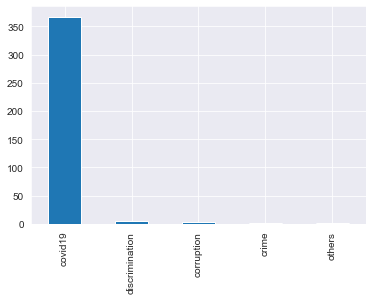

In [591]:
df_m3['negative_reason'].value_counts().plot(kind = 'bar')

### How each PArty is viewed

In [592]:
df_election_us_clean.head(2)

,text,clean,negative_reason,twitter_handles,hashtags_all,Republican,Democratic,Uncertain,Party,sentiment
0,brobreiner so afraid of Nov Dec and Jan Even if BidenHarris2020 has 3 months to do even more damage than he,brobreiner afraid Nov Dec Jan Even BidenHarris2020 3 months damage,covid19,@robreiner,#BidenHarris2020,0,1,0,Democrat,0
1,bRT SueC00K Lord Sumption launches Recovery a new initiative to promote AnotherWay to deal with Covid Hysteria and rushed laws,bRT SueC00K Lord Sumption launches Recovery initiative promote AnotherWay deal Covid Hysteria rushed laws,others,@SueC00K,#AnotherWay #Covid,0,0,1,Uncertain,0


In [593]:
df_party_neg = df_election_us_clean[['Party','sentiment']]
df_party_neg.head(2)

,Party,sentiment
0,Democrat,0
1,Uncertain,0


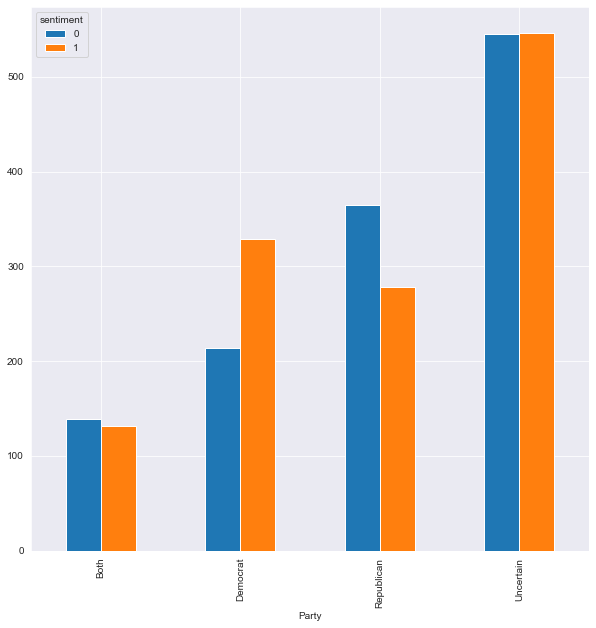

In [594]:
number = df_election_us_clean.groupby(['Party','sentiment'])
size = number.size()
size.unstack(level=-1).plot(kind='bar', figsize = (10,10)) 

looking at the results we can see that most people are uncertain about their political affiliation for their negative as wella s positive sentiment.
<br>
Democrats have a very high positive response compared to negative. Which shows they are positive in public eyes and more good things are talked about them.
<br>
Republicans have more negative sentiments compared to positive that means ther is more negative is being talked about which can show how people are unhappy with the republican party.
<br>

there are some people who show same sentiment for both parties however, people that show both sentiment have more negative sentiment than positive. though the difference is less. 

<br> parties seeking to focus should focus on uncertain people and look at the reason behind negative sentiments as shown by our 1st model discussed above which is covid and see how its effecting their campaign.

### Why Naive Bayes failed to predict

One of the main reason our model was failed to predict was that there were not enough data available as we only had 1200+ tweets. This can cause our model to underfit. Additionally there were 5 classsifications and since we did not have much data the model could not predict based on tokenization as each tweet might not contain all the negative words. This could further show issues in our data.

Additionally, it could be possible that some negative words that should have been in the  training data were removed. during data cleaning process making it hard for the model to associate certain words in tweet to the negative sentiment cause. 


In [595]:
print(X5.shape)
X5.head(10)

(1263,)


0     brobreiner afraid Nov Dec Jan Even BidenHarris2020 3 months damage                                       
1     bRT SueC00K Lord Sumption launches Recovery initiative promote AnotherWay deal Covid Hysteria rushed laws
2     bRT WalidPhares Uber Timing Biden advisors pressure Brazil sanction jairbolsonaro Gov elected            
5     accelerating rising Americans killed TrumpVirus                                                          
6     brealDonaldTrump 961 dead Americans day 240 times number died Benghazi The lost                          
8     bcharliekirk11 reason realdonaldtrump 3 rallies losing                                                   
9     bRT JoeBarri Anyone concerned HunterBiden Trump asskisser human fraud WTF CURRENT                        
10    bBreakingNews October CatsOfTwitter dogsoftwitter wake fuck time BidenHarris2020                         
11    brealDonaldTrump Is ur campaign paid people rig mess Postal mail                                  

additionally we can see that there are some tweets that talk about covid, figuring out the exact sentiment of racism, discrimination is hard from the words that were give. Since the model had only 1263 rows of tweets to process it could be hard for the model to predict correctly.

# Bonus

## Visualization

In [596]:
!pip install pillow

In [597]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

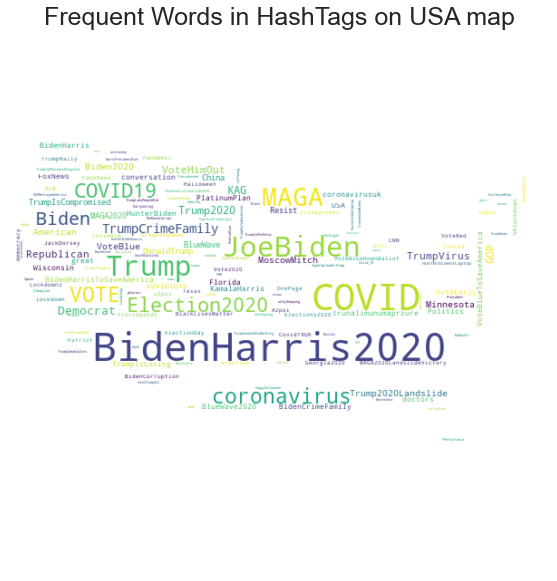

In [625]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

try:
    imageMask = np.array(Image.open('usa.jpeg'))

    # Visualizing Top 100 hashtags in Tweet
    hashtag = df_election_us_clean['hashtags_all']
    str_hashtag = ' '.join([''.join(elems) for elems in hashtag])

    try:
        wordcloud = WordCloud(max_font_size=300,max_words=1000, background_color='white',width = 4000,min_word_length=2, 
                              height = 3000,collocations=False, mask = imageMask).generate(str_hashtag)
    except:
        wordcloud = WordCloud(max_font_size=300,max_words=1000, background_color='white',width = 4000, 
                              height = 3000,collocations=False).generate(str_hashtag)

    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Frequent Words in HashTags on USA map',fontsize=25)
    plt.axis("off")
    plt.show()
except:
    pass

# Using Keras to try Prediction on model (FOR GOOGLE COLLAB)

## Note there was another model that was tried with GLobe Vector Embedding after this. please scroll further down for that.
("External files required which are not submitted as said in piazza")

In [ ]:
!pip install keras
!pip install tensorflow

In [ ]:
!pip install gensim
from gensim.models import FastText

In [ ]:
# Keras imports
import string
import numpy as np
import pandas as pd
import sklearn.feature_extraction as skprep
from sklearn.metrics import roc_curve, auc
from itertools import compress
import matplotlib.pyplot as plt
import seaborn as sns
import random
import codecs
random.seed(20190124)
%matplotlib inline

import keras
from keras import backend as K
from keras.utils.data_utils import get_file
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Input, Embedding, Reshape, merge, MaxPooling1D, Concatenate, concatenate
from keras.layers import Activation
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD, RMSprop, Adam
from keras.metrics import categorical_crossentropy, categorical_accuracy
from keras.layers.convolutional import *
from keras.preprocessing import image, sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from numpy import array

# Others
import numpy as np
from sklearn.model_selection import train_test_split

# For AUC estimation and ROC plots
from sklearn.metrics import roc_curve, auc, confusion_matrix

# To visualize models
import matplotlib.pyplot as plt
from keras.utils import plot_model
from IPython.display import Image
import string
%matplotlib inline
try:
    import wget
except:
    !pip install wget
    import wget

!pip install pydot
from keras import models
from keras import layers
from numpy import asarray

In [ ]:
!wget https://github.com/facebookresearch/fastText/archive/v0.9.1.zip
  
!unzip v0.9.1.zip

In [ ]:
%cd fastText-0.9.1

In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
  
!gunzip -v -f cc.en.300.bin.gz

In [ ]:
tokenizer = Tokenizer() # Creates tokenizer model.
tokenizer.fit_on_texts(df_election_us_clean['clean']) # Trains it over the tokens that we have.
Vals = list(tokenizer.word_index.keys())
vocab_size = len(tokenizer.word_index) + 1

# Write CSV with the output.
file = codecs.open('election.csv', "w", "utf-8")

for item in Vals:
    file.write("%s\r\n" % item)
    
file.close()
!ls

In [ ]:
!./fastText-0.9.1/fasttext print-sentence-vectors fastText-0.9.1/cc.en.300.bin < election.csv > Embeddingelection.tsv

In [ ]:
!head Embeddingelection.tsv

In [ ]:
import fileinput

with fileinput.FileInput('Embeddingelection.tsv', inplace=True, backup='.bak') as file:
    for line in file:
        print(line.replace(' ', ','), end='')

In [ ]:
# Create the first line
firstLine = ','.join(['D'+str(i) for i in np.arange(1, 301)]) + '\n'

# Open as read only. Read the file
with open('Embeddingelection.tsv', 'r') as original: 
  data = original.read()

# Open to write and write the first line and the rest
with open('Embeddingelection.csv', 'w') as modified: 
  modified.write(firstLine + data)

In [ ]:
# Read word embeddings
Embeddings = pd.read_csv('election.csv', sep=',', decimal = '.', 
                         low_memory = True, index_col = False)
Embeddings.describe()

In [ ]:
# Create embedding dictionary

EmbeddingsDict = dict(zip(Vals, Embeddings.values))

In [ ]:
# Count maximum number of words per file.
wordDist = [len(w.split()) for w in df_election_us_clean['clean']]
print('Avg. no of words: ' + str(np.round(np.mean(wordDist), 2)))
print('Std. deviation: ' + str(np.round(np.std(wordDist), 2)))
print('Max words: ' + str(np.max(wordDist)))

# Generate the plot
distAirlines = sns.distplot(wordDist)

# I'm saving the image to a PDF, as it makes it easier later to download.
distAirlines.figure.savefig("wordDist.pdf", format = "pdf")

In [ ]:
# Create word index from input
sequences = tokenizer.texts_to_sequences(df_election_us_clean['clean']) # Create the sequences.

# Creates the indexes. Word index is a dictionary with words in it.
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# Creates the training dataset, adding padding when necessary.
data = pad_sequences(sequences, maxlen=100, 
                     padding = 'post') # add padding at the end. No difference in practice.

# Creates the objective function
labels = df_election_us_clean[['sentiment']]
 
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

In [ ]:
# Create first matrix full with 0's
embedding_matrix = np.zeros((len(word_index) + 1, 100))

# Generate embeddings matrix
for word, i in word_index.items():

  try:
    embedding_vector = EmbeddingsDict.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
  except:
    pass

# Print what came out
embedding_matrix

In [ ]:
# Filter sizes to use.
filter_sizes = (2,3,4,6)

# Initialize. We need to give it the input dimension (from the Embedding!)
graph_in = Input(shape=(36, 100))
convs = []
avgs = []

# This for stacks the layers. Inside each for, we build the sequence of layer. The command "append" adds
# that to the "conv" variable, which is simply a stack of convolutions.
for fsz in filter_sizes:
    conv = Conv1D(filters=128,
                  kernel_size=fsz,
                         padding='valid',
                         activation='relu',
                         strides=1)(graph_in) # Note the (graph_in). This means "put this layer AFTER the graph_in layer.
    conv = Dropout(0.6)(conv)
    pool = MaxPooling1D(pool_size=36 - fsz + 1)(conv) # Put this layer AFTER the convolution just created.
    flattenMax = Flatten()(pool) # Flatten the pooling layer.
    convs.append(flattenMax) # Append this to the convs object that saves the stack.
    
# Concatenate layers.
if len(filter_sizes)>1:
    out = Concatenate()(convs)
else:
    out = convs[0]

graph = Model(inputs=graph_in, outputs=out, name="graphModel")

graph.summary()

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import plot_model
from IPython.display import Image
%matplotlib inline

plot_model(graph, show_shapes=True, show_layer_names=True, to_file='GraphModel.png')
Image(retina=True, filename='GraphModel.png')

In [ ]:
# Final model
model = Sequential()
embedding_layer = Embedding(len(embedding_matrix),           # Words in the embedding.
                            100,                           # Embedding dimension
                            weights=[embedding_matrix],    # The weights we just calculated
                            input_length=100,              # The maximum number of words.
                            trainable=False)               # To NOT recalculate weights!

model.add(embedding_layer)

# Now we add our graph model
model.add(graph)

# Add a few layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# adam = Adam(clipnorm=.1)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
Image(retina=True, filename='model.png')

In [ ]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33,
                                                    random_state=20190925, 
                                                    stratify = labels)

# Define Class weights for balance
class_weight = {0: 14485 / (1 * 9082),
                1: 14485 / (1 * 3069)}

In [ ]:
# Fit the model
model.fit(X_train, y_train, validation_split=0.33, epochs=5, batch_size=20,
          class_weight = class_weight)

In [ ]:
# Plot history
sns.set_style("darkgrid")
plt.plot(model.history.history['loss'])
plt.title('Training Loss')

plt.show()

sns.set_style("darkgrid")
plt.plot(model.history.history['val_loss'])
plt.title('Validation Loss')

plt.show()

# Using DNN on US Election File to Predict Sentiment (0,1)

In [599]:
#!pip install keras
#!pip install tensorflow

In [600]:
!pip install gensim
from gensim.models import FastText

In [601]:
# Keras imports
import string
import numpy as np
import pandas as pd
import sklearn.feature_extraction as skprep
from sklearn.metrics import roc_curve, auc
from itertools import compress
import matplotlib.pyplot as plt
import seaborn as sns
import random
import codecs
random.seed(20190124)
%matplotlib inline

import keras
from keras import backend as K
from keras.utils.data_utils import get_file
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Input, Embedding, Reshape, merge, MaxPooling1D, Concatenate, concatenate
from keras.layers import Activation
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD, RMSprop, Adam
from keras.metrics import categorical_crossentropy, categorical_accuracy
from keras.layers.convolutional import *
from keras.preprocessing import image, sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from numpy import array

# Others
import numpy as np
from sklearn.model_selection import train_test_split

# For AUC estimation and ROC plots
from sklearn.metrics import roc_curve, auc, confusion_matrix

# To visualize models
import matplotlib.pyplot as plt
from keras.utils import plot_model
from IPython.display import Image
import string
%matplotlib inline
try:
    import wget
except:
    !pip install wget
    import wget

!pip install pydot
from keras import models
from keras import layers
from numpy import asarray

In [602]:
## Creating Text Based Embeddings

In [603]:
#!wget --https://github.com/facebookresearch/fastText/archive/v0.9.1.zip

In [604]:
tokenizer = Tokenizer() # Creates tokenizer model.
tokenizer.fit_on_texts(df_election_us_clean['clean']) # Trains it over the tokens that we have.
Vals = list(tokenizer.word_index.keys())
vocab_size = len(tokenizer.word_index) + 1

In [605]:
#using glove encoding

from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [606]:
#embedding weights 
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [607]:
#embeddings_index = dict()


In [608]:
# Create word index from input
sequences = tokenizer.texts_to_sequences(df_election_us_clean['clean']) # Create the sequences.

# Creates the indexes. Word index is a dictionary with words in it.
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# Creates the training dataset, adding padding when necessary.
data = pad_sequences(sequences, maxlen=100, 
                     padding = 'post') # add padding at the end. No difference in practice.

# Creates the objective function
labels = df_election_us_clean[['sentiment']]
 
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 8394 unique tokens.
Shape of data tensor: (2548, 100)
Shape of label tensor: (2548, 1)


In [609]:

# Filter sizes to use.
filter_sizes = (2,3,4,6)

# Initialize. We need to give it the input dimension (from the Embedding!)
graph_in = Input(shape=(36, 100))
convs = []
avgs = []

# This for stacks the layers. Inside each for, we build the sequence of layer. The command "append" adds
# that to the "conv" variable, which is simply a stack of convolutions.
for fsz in filter_sizes:
    conv = Conv1D(filters=128,
                  kernel_size=fsz,
                         padding='valid',
                         activation='relu',
                         strides=1)(graph_in) # Note the (graph_in). This means "put this layer AFTER the graph_in layer.
    conv = Dropout(0.6)(conv)
    pool = MaxPooling1D(pool_size=36 - fsz + 1)(conv) # Put this layer AFTER the convolution just created.
    flattenMax = Flatten()(pool) # Flatten the pooling layer.
    convs.append(flattenMax) # Append this to the convs object that saves the stack.
    
# Concatenate layers.
if len(filter_sizes)>1:
    out = Concatenate()(convs)
else:
    out = convs[0]

graph = Model(inputs=graph_in, outputs=out, name="graphModel")

graph.summary()

Model: "graphModel"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 36, 100)]    0                                            
__________________________________________________________________________________________________
conv1d_16 (Conv1D)              (None, 35, 128)      25728       input_5[0][0]                    
__________________________________________________________________________________________________
conv1d_17 (Conv1D)              (None, 34, 128)      38528       input_5[0][0]                    
__________________________________________________________________________________________________
conv1d_18 (Conv1D)              (None, 33, 128)      51328       input_5[0][0]                    
_________________________________________________________________________________________

In [610]:
model = Sequential()
embedding_layer = Embedding(vocab_size,           # Words in the embedding.
                            100,                           # Embedding dimension
                            weights=[embedding_matrix],    # The weights we just calculated
                            input_length=100,              # The maximum number of words.
                            trainable=False)               # To NOT recalculate weights!

model.add(embedding_layer)

# Now we add our graph model
model.add(graph)

# Add a few layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))

In [611]:
# adam = Adam(clipnorm=.1)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [612]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 100, 100)          839500    
_________________________________________________________________
graphModel (Functional)      (None, 512)               192512    
_________________________________________________________________
dense_30 (Dense)             (None, 128)               147584    
_________________________________________________________________
dropout_38 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 129       
Total params: 1,179,725
Trainable params: 340,225
Non-trainable params: 839,500
_________________________________________________________________


In [613]:
#plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')


In [614]:
#Image(retina=True, filename='model.png')

In [615]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33,
                                                    random_state=20190925,
                                                    stratify = labels)

# Define Class weights for balance
class_weight = {0: 14485 / (1 * 9082),
                1: 14485 / (1 * 3069)}

In [616]:
# Fit the model
model.fit(X_train, y_train, validation_split=0.33, epochs=25, batch_size=32)

Epoch 1/25
36/36 [==============================] - 3s 70ms/step - loss: 5.8718e-08 - acc: 0.5004 - val_loss: 6.2986e-08 - val_acc: 0.4734
Epoch 2/25
36/36 [==============================] - 1s 31ms/step - loss: 5.8718e-08 - acc: 0.4864 - val_loss: 6.2986e-08 - val_acc: 0.4734
Epoch 3/25
36/36 [==============================] - 1s 29ms/step - loss: 5.8718e-08 - acc: 0.4768 - val_loss: 6.2986e-08 - val_acc: 0.4734
Epoch 4/25
36/36 [==============================] - 1s 28ms/step - loss: 5.8718e-08 - acc: 0.5101 - val_loss: 6.2986e-08 - val_acc: 0.4734
Epoch 5/25
36/36 [==============================] - 1s 28ms/step - loss: 5.8718e-08 - acc: 0.4996 - val_loss: 6.2986e-08 - val_acc: 0.4734
Epoch 6/25
36/36 [==============================] - 1s 29ms/step - loss: 5.8718e-08 - acc: 0.4619 - val_loss: 6.2986e-08 - val_acc: 0.4734
Epoch 7/25
36/36 [==============================] - 1s 29ms/step - loss: 5.8718e-08 - acc: 0.5092 - val_loss: 6.2986e-08 - val_acc: 0.4734
Epoch 8/25
36/36 [=========

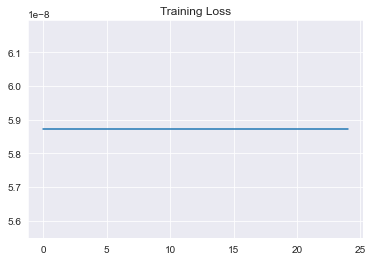

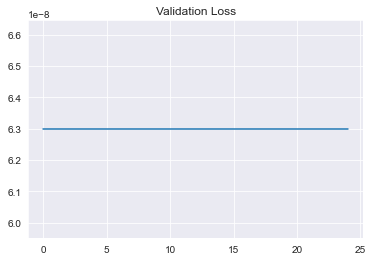

In [617]:
# Plot history
sns.set_style("darkgrid")
plt.plot(model.history.history['loss'])
plt.title('Training Loss')

plt.show()

sns.set_style("darkgrid")
plt.plot(model.history.history['val_loss'])
plt.title('Validation Loss')

plt.show()

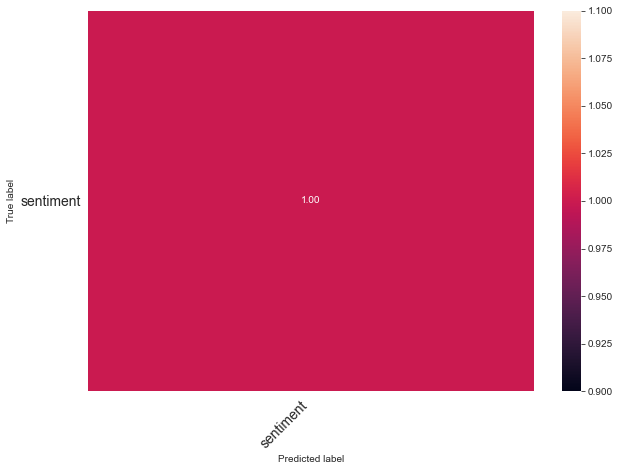

In [618]:
# Calculate outputs in test set
prob_test = np.round(model.predict(X_test))
prob_test = pd.DataFrame(data = prob_test, columns = ['sentiment'])
prob_test = prob_test.idxmax(axis = 1)

y_test_label = y_test.idxmax(axis = 1)

# Calculate confusion matrix
confusion_matrix_dnn = confusion_matrix(y_true = y_test_label, 
                    y_pred = prob_test)

# Turn matrix to percentages
confusion_matrix_dnn = confusion_matrix_dnn.astype('float') / confusion_matrix_dnn.sum(axis=1)[:, np.newaxis]

# Turn to dataframe
df_cm = pd.DataFrame(
        confusion_matrix_dnn, index=['sentiment'],
         columns=['sentiment'], 
)

# Parameters of the image
figsize = (10,7)
fontsize=14

# Create image
fig = plt.figure(figsize=figsize)
heatmap = sns.heatmap(df_cm, annot=True, fmt='.2f')

# Make it nicer
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, 
                             ha='right', fontsize=fontsize)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45,
                             ha='right', fontsize=fontsize)

# Add labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Plot!
plt.show()

We can see that the model accuracy is very low in the training. this could be due to not having enough data